In [1]:
from sklearn import ensemble, cross_validation, learning_curve, metrics
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import GroupKFold

from sklearn.model_selection import GroupShuffleSplit
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from scipy.stats.kde import gaussian_kde
from scipy.optimize import brentq

import itertools

C:\Users\Popova_Va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Popova_Va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Popova_Va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are mov

In [2]:
triplexes = pd.read_csv('basetriples.csv', header=0, sep='\t')

In [9]:
triplexes.head()

,pdb_chain,type,dssrs,bps,dists,same12,local12,longrange12,same23,local23,...,h3p5,b3p5,i3p5,j3p5,lc3p5,li3p5,lp3p5,fl3p5,fed3p5,istriple
0,1b23.cif1_R,110,R.4SU.8.R.C.11.R.G.15.,-_-_-,11.88_20.1_12.32,0,1,0,0,1,...,1,0,0,0,1,0,0,9,1,0
1,1b23.cif1_R,110,R.A.9.R.A.13.R.C.62.,tHW_-_-,11.7_27.0_26.22,0,0,1,0,0,...,0,0,0,0,0,0,0,7,1,0
2,1b23.cif1_R,111,R.4SU.8.R.A.14.R.A.46.,tWH_t.W_cSS,10.04_12.76_4.86,0,0,1,0,0,...,0,0,0,0,0,0,0,5,1,1
3,1b23.cif1_R,111,R.4SU.8.R.G.15.R.G.48.,-_t.W_cSS,12.32_13.49_4.06,0,0,1,0,0,...,0,0,0,0,0,0,0,5,0,1
4,1b23.cif1_R,111,R.A.9.R.A.13.R.A.22.,tHW_tSH_-,11.7_10.01_13.84,0,0,1,1,0,...,0,0,0,0,0,0,0,4,0,1


In [22]:
triplexes.shape

(34415, 477)

In [11]:
triplexes.columns

Index(['pdb_chain', 'type', 'dssrs', 'bps', 'dists', 'same12', 'local12',
       'longrange12', 'same23', 'local23',
       ...
       'h3p5', 'b3p5', 'i3p5', 'j3p5', 'lc3p5', 'li3p5', 'lp3p5', 'fl3p5',
       'fed3p5', 'istriple'],
      dtype='object', length=477)

In [12]:
#целевая переменная
triplex_target = triplexes.istriple.values

In [14]:
triplex_target, len(triplex_target)

(array([0, 0, 1, ..., 0, 1, 0], dtype=int64), 34415)

In [18]:
print('triplex = 1: {:.2f}\ntriplex = 0: {:.2f}'.format(sum(triplex_target)/float(len(triplex_target)), 
                                                       1.0 - sum(triplex_target)/float(len(triplex_target))))

triplex = 1: 0.15
triplex = 0: 0.85


In [23]:
Counter(list(triplexes.pdb_chain.values))
#print(list(triplexes.pdb_chain.values))

Counter({'1b23.cif1_R': 19,
         '1c0a.cif1_B': 38,
         '1e8o.cif1_E': 2,
         '1et4.cif1_A': 15,
         '1evv.cif1_A': 23,
         '1f1t.cif1_A': 8,
         '1f7u.cif1_B': 11,
         '1fir.cif1_A': 25,
         '1gax.cif1_D': 19,
         '1h3e.cif1_B': 10,
         '1h4s.cif1_T': 33,
         '1hc8.cif1_C': 16,
         '1i6u.cif1_C': 12,
         '1il2.cif1_C': 22,
         '1j1u.cif1_B': 27,
         '1j2b.cif1_C': 4,
         '1kh6.cif1_A': 3,
         '1kog.cif1_O': 14,
         '1kuq.cif1_B': 8,
         '1kxk.cif1_A': 7,
         '1l2x.cif1_A': 5,
         '1mfq.cif1_A': 32,
         '1mji.cif1_D': 15,
         '1mms.cif1_C': 17,
         '1mzp.cif1_B': 19,
         '1n78.cif1_C': 24,
         '1nbs.cif1_B': 67,
         '1q96.cif1_A': 2,
         '1qf6.cif1_B': 26,
         '1qtq.cif1_B': 25,
         '1qu2.cif1_T': 19,
         '1s03.cif1_B': 5,
         '1s03.cif1_A': 14,
         '1ser.cif1_T': 20,
         '1u0b.cif1_A': 26,
         '1u6b.cif1_B': 70,
 

In [3]:
### !!!!! необходимые данные

triplexes_data = triplexes.iloc[:, 5:475]
triplexes_target = triplexes.iloc[:, 476]

In [30]:
triplexes_data[:1]

,same12,local12,longrange12,same23,local23,longrange23,same13,local13,longrange13,a1m5,...,u3p5,s3p5,h3p5,b3p5,i3p5,j3p5,lc3p5,li3p5,lp3p5,fl3p5
0,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,9


In [21]:
# разбиение на train и test простое (не используем)
from sklearn import cross_validation
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(triplexes_data, triplexes_target, test_size=0.3, )

In [5]:
#разбиваем выборки по группам pdb_chain

gss = GroupShuffleSplit(n_splits=1, test_size=0.3)
train_dataset,test_dataset = next(gss.split(X=triplexes, y=triplexes['istriple'], groups=triplexes.pdb_chain.values))


In [33]:
train_dataset.shape

(24338,)

# CONFUSION MATRIX ПО ГРУППАМ

In [6]:
#обучающая и тестовая выборки

check_train = triplexes.loc[list(train_dataset)]
target_train = check_train.istriple.values

check_train = check_train.iloc[:, 5:475]

check_test = triplexes.loc[list(test_dataset)]
target_test = check_test.istriple.values

rf_classifier = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)
rf_classifier.fit(check_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

CONFUSION MATRIX 5dea.cif1_C
[[1 1]
 [0 1]]

AUC =  1.0


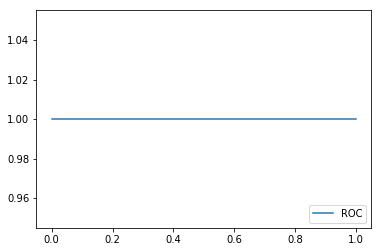

CONFUSION MATRIX 3pdr.cif1_X
[[44  1]
 [ 5  3]]

AUC =  0.9333333333333333


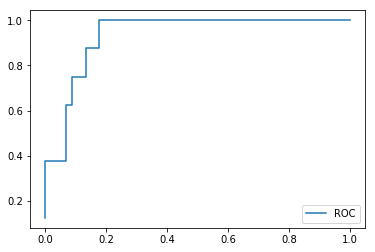

CONFUSION MATRIX 4v90.cif1_AV
[[16  0]
 [ 3  0]]

AUC =  0.7916666666666666


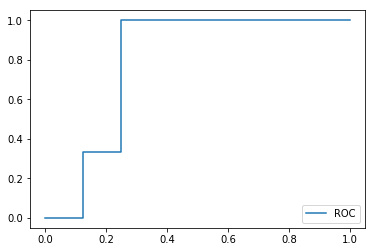

CONFUSION MATRIX 3wqy.cif1_C
[[21  1]
 [ 0  5]]

AUC =  0.990909090909091


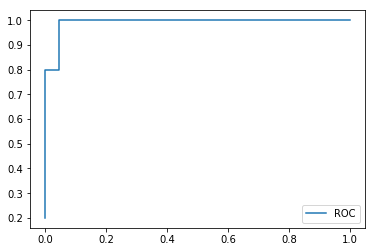

CONFUSION MATRIX 5xxb.cif1_3
[[45  2]
 [ 0  8]]

AUC =  0.9946808510638298


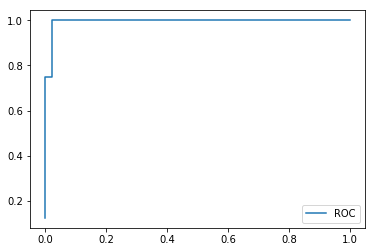

CONFUSION MATRIX 6cmn.cif1_D
[[1 1]
 [0 1]]

AUC =  1.0


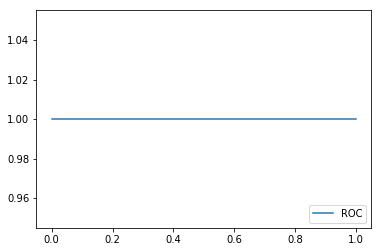

CONFUSION MATRIX 4gcw.cif1_B
[[10  7]
 [ 1  2]]

AUC =  0.6862745098039215


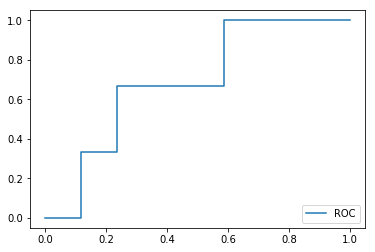

CONFUSION MATRIX 6ek0.cif1_S6
[[13  1]
 [ 0  3]]

AUC =  0.9523809523809524


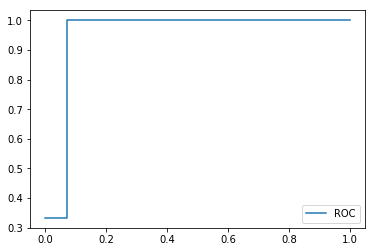

CONFUSION MATRIX 5t83.cif1_A
[[28  1]
 [ 0  5]]

AUC =  0.9793103448275863


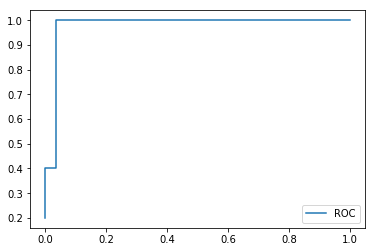

CONFUSION MATRIX 4yco.cif1_D
[[21  3]
 [ 1  4]]

AUC =  0.95


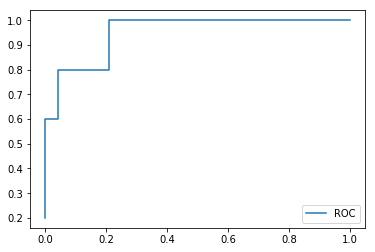

CONFUSION MATRIX 1gax.cif1_D
[[14  1]
 [ 0  4]]

AUC =  1.0


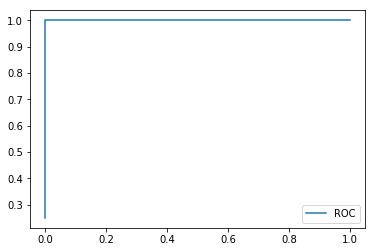

CONFUSION MATRIX 5nwq.cif1_A
[[18  1]
 [ 2  1]]

AUC =  0.7719298245614036


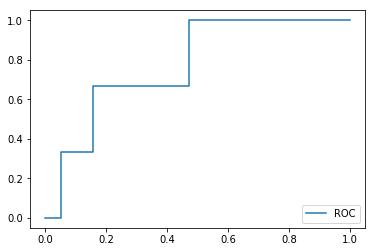

CONFUSION MATRIX 2oiu.cif1_Q
[[2]]

ERROR Only one class present in y_true. ROC AUC score is not defined in that case. 2oiu.cif1_Q


C:\Users\Popova_Va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


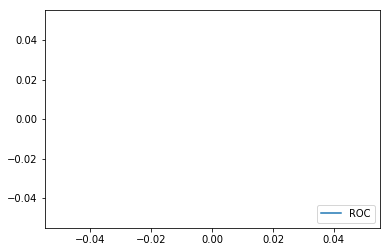

CONFUSION MATRIX 6ha1.cif1_x
[[2 0]
 [0 1]]

AUC =  1.0


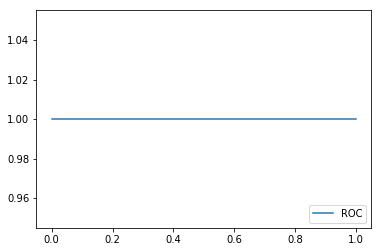

CONFUSION MATRIX 3hjw.cif1_D
[[1]]

ERROR Only one class present in y_true. ROC AUC score is not defined in that case. 3hjw.cif1_D


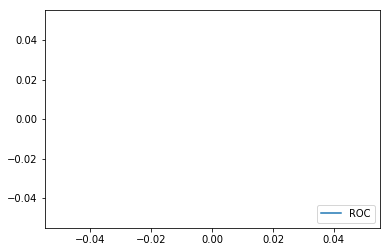

CONFUSION MATRIX 5ktj.cif1_A
[[11  1]
 [ 0  1]]

AUC =  1.0


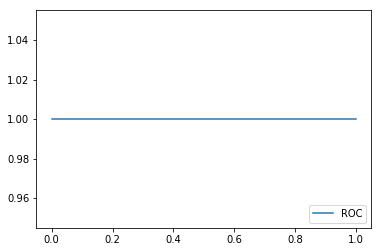

CONFUSION MATRIX 1mms.cif1_C
[[10  4]
 [ 0  3]]

AUC =  0.9761904761904763


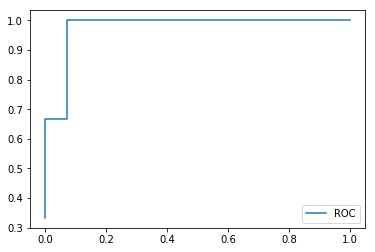

CONFUSION MATRIX 3j9m.cif1_AA
[[272   0]
 [ 11  35]]

AUC =  0.9979219948849105


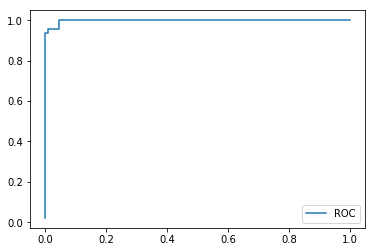

CONFUSION MATRIX 3q3z.cif1_V
[[19  0]
 [ 1  3]]

AUC =  1.0


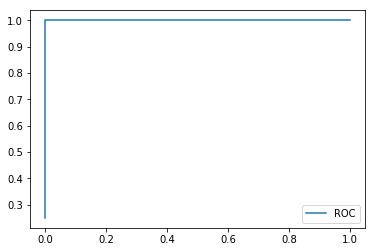

CONFUSION MATRIX 1n78.cif1_C
[[19  1]
 [ 1  3]]

AUC =  0.9624999999999999


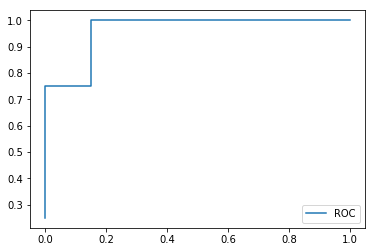

CONFUSION MATRIX 4wj4.cif1_B
[[27  1]
 [ 1  4]]

AUC =  0.9785714285714286


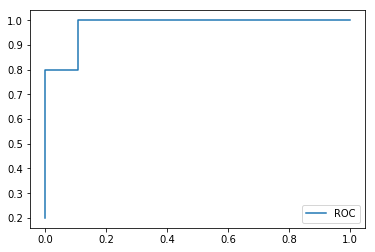

CONFUSION MATRIX 5b63.cif1_D
[[14  1]
 [ 0  3]]

AUC =  1.0


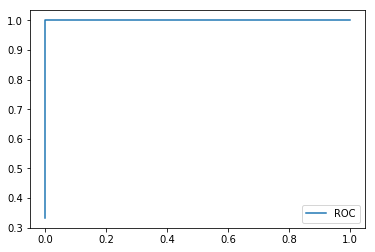

CONFUSION MATRIX 5e81.cif1_2K
[[14  0]
 [ 0  3]]

AUC =  1.0


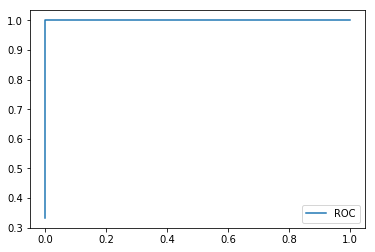

CONFUSION MATRIX 5xym.cif1_B
[[38  2]
 [ 0  7]]

AUC =  0.9857142857142857


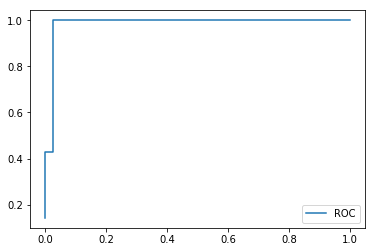

CONFUSION MATRIX 5t2a.cif1_B
[[215   1]
 [  3  33]]

AUC =  0.9971707818930041


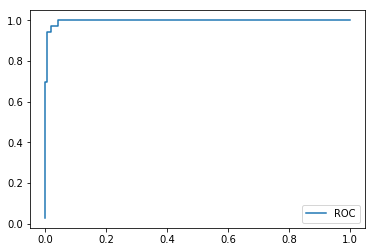

CONFUSION MATRIX 5x2g.cif1_B
[[10  1]
 [ 0  1]]

AUC =  1.0


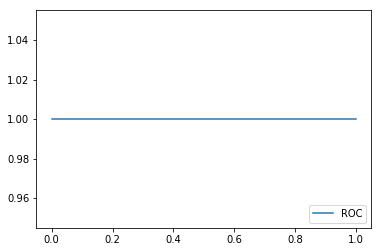

CONFUSION MATRIX 6ek0.cif1_S2
[[470   1]
 [ 19  60]]

AUC =  0.9961299685559946


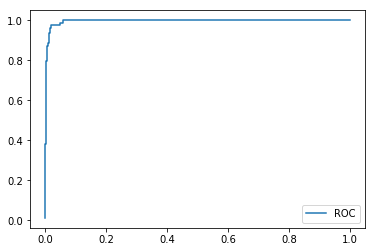

CONFUSION MATRIX 6gaw.cif1_BB
[[18  1]
 [ 1  3]]

AUC =  0.9736842105263158


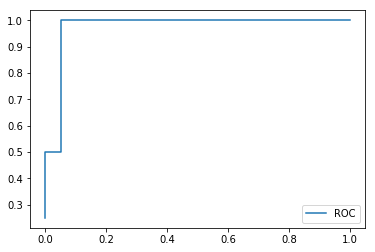

CONFUSION MATRIX 1s03.cif1_B
[[3 0]
 [0 2]]

AUC =  1.0


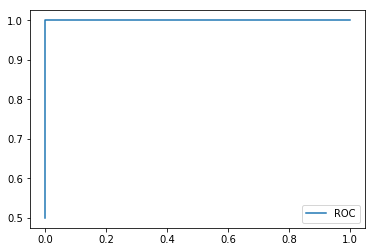

CONFUSION MATRIX 5axm.cif1_P
[[20  0]
 [ 0  4]]

AUC =  1.0


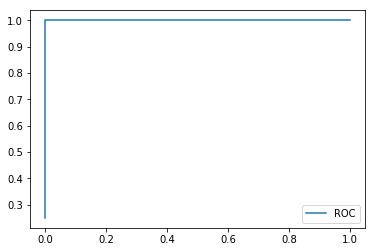

CONFUSION MATRIX 1hc8.cif1_C
[[13  0]
 [ 0  3]]

AUC =  1.0


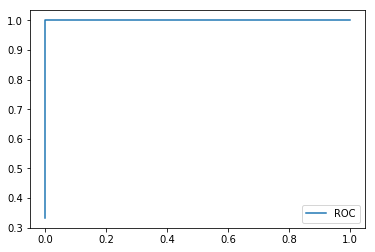

CONFUSION MATRIX 3skl.cif1_B
[[19  1]
 [ 1  3]]

AUC =  0.9750000000000001


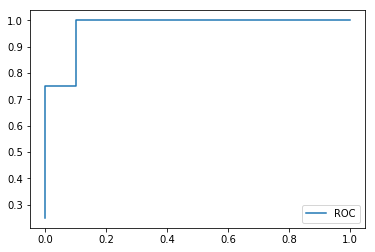

CONFUSION MATRIX 4kqy.cif1_A
[[37  1]
 [ 3  4]]

AUC =  0.9285714285714286


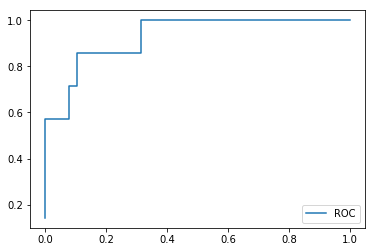

CONFUSION MATRIX 3moj.cif1_A
[[8 0]
 [0 2]]

AUC =  1.0


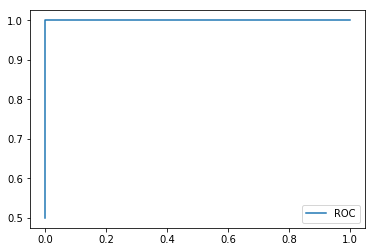

CONFUSION MATRIX 2csx.cif1_C
[[17  2]
 [ 0  4]]

AUC =  0.986842105263158


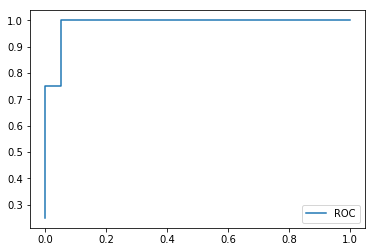

CONFUSION MATRIX 5xy3.cif1_1
[[647   6]
 [ 36  73]]

AUC =  0.9895190862216727


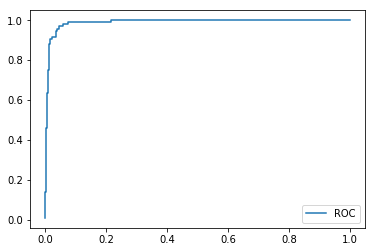

CONFUSION MATRIX 3k1v.cif1_A
[[2]]

ERROR Only one class present in y_true. ROC AUC score is not defined in that case. 3k1v.cif1_A


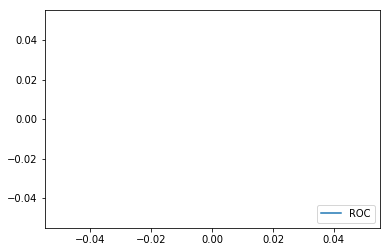

CONFUSION MATRIX 4ato.cif1_G
[[13  0]
 [ 0  3]]

AUC =  1.0


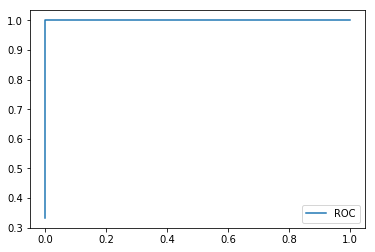

CONFUSION MATRIX 4frn.cif1_B
[[6 0]
 [1 0]]

AUC =  0.8333333333333334


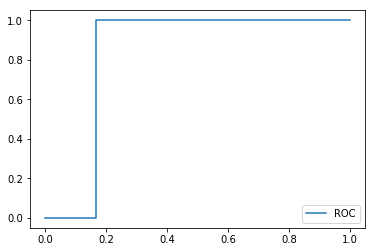

CONFUSION MATRIX 1c0a.cif1_B
[[32  0]
 [ 1  5]]

AUC =  0.984375


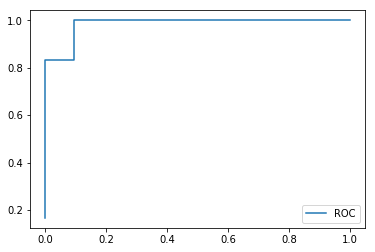

CONFUSION MATRIX 5kpy.cif1_A
[[3 0]
 [1 0]]

AUC =  0.6666666666666667


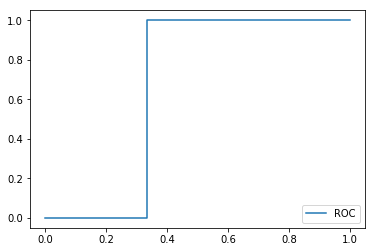

CONFUSION MATRIX 3j7a.cif1_7
[[3 0]
 [1 0]]

AUC =  0.6666666666666667


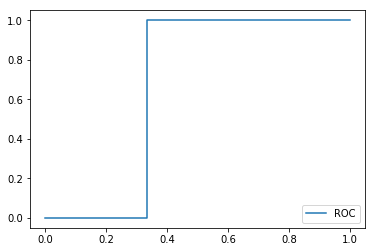

CONFUSION MATRIX 4wsm.cif1_3L
[[8 0]
 [0 2]]

AUC =  1.0


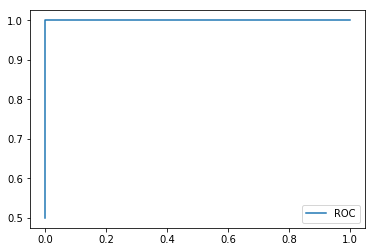

CONFUSION MATRIX 1qu2.cif1_T
[[16  0]
 [ 0  3]]

AUC =  1.0


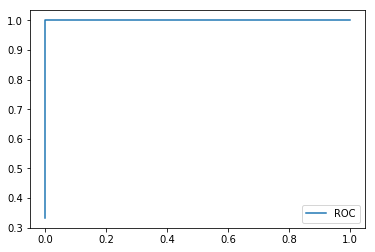

CONFUSION MATRIX 6az3.cif1_6
[[1]]

ERROR Only one class present in y_true. ROC AUC score is not defined in that case. 6az3.cif1_6


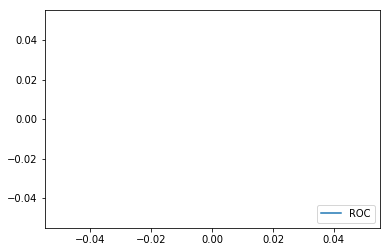

CONFUSION MATRIX 1un6.cif1_F
[[5 2]
 [0 2]]

AUC =  1.0


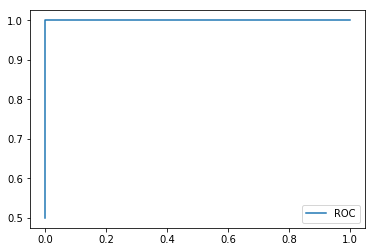

CONFUSION MATRIX 2der.cif1_D
[[24  1]
 [ 1  4]]

AUC =  0.9359999999999999


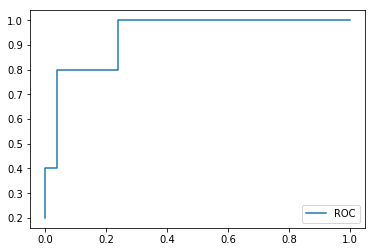

CONFUSION MATRIX 2il9.cif1_A
[[12  1]
 [ 1  1]]

AUC =  0.9615384615384616


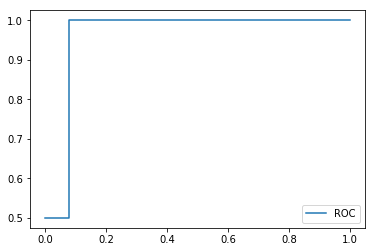

CONFUSION MATRIX 3iwn.cif1_A
[[26  1]
 [ 1  4]]

AUC =  0.9851851851851852


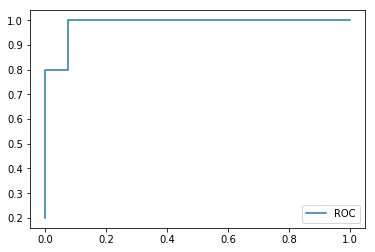

CONFUSION MATRIX 5lys.cif1_B
[[25  1]
 [ 1  5]]

AUC =  0.9551282051282052


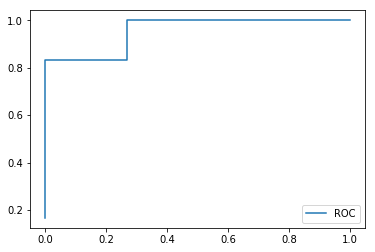

CONFUSION MATRIX 3oxe.cif1_A
[[12  3]
 [ 0  3]]

AUC =  0.8666666666666667


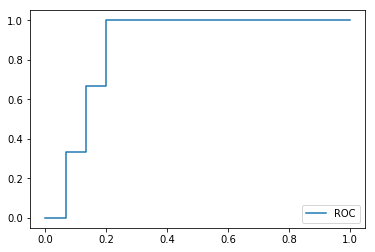

CONFUSION MATRIX 4aob.cif1_A
[[24  4]
 [ 1  4]]

AUC =  0.95


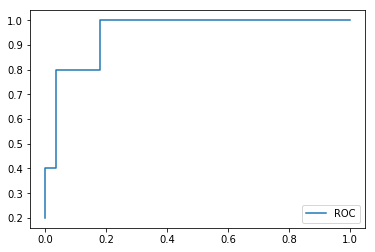

CONFUSION MATRIX 4tue.cif1_QV
[[16  0]
 [ 0  3]]

AUC =  1.0


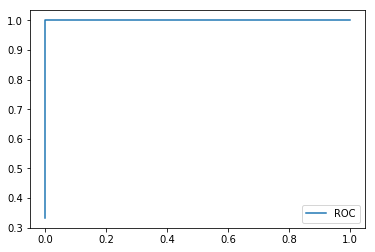

CONFUSION MATRIX 3f2x.cif1_X
[[27  1]
 [ 2  3]]

AUC =  0.9357142857142857


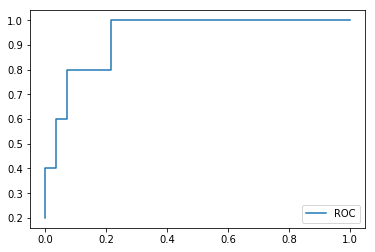

CONFUSION MATRIX 1qf6.cif1_B
[[21  1]
 [ 0  4]]

AUC =  1.0


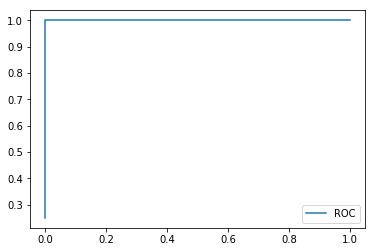

CONFUSION MATRIX 4uyk.cif1_R
[[24  1]
 [ 3  2]]

AUC =  0.888


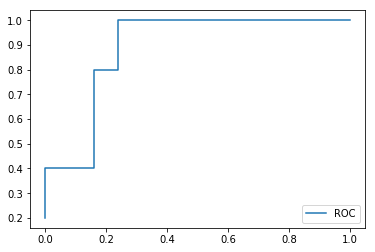

CONFUSION MATRIX 5j7l.cif1_DB
[[47  1]
 [ 0  9]]

AUC =  0.9976851851851851


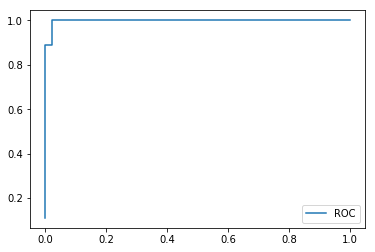

CONFUSION MATRIX 2xd0.cif1_W
[[13  4]
 [ 1  3]]

AUC =  0.9411764705882353


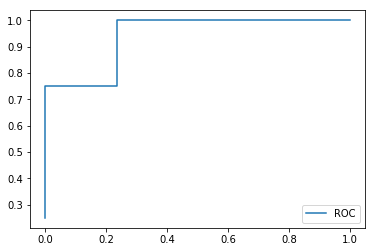

CONFUSION MATRIX 5wwt.cif1_C
[[15  2]
 [ 0  3]]

AUC =  0.9803921568627451


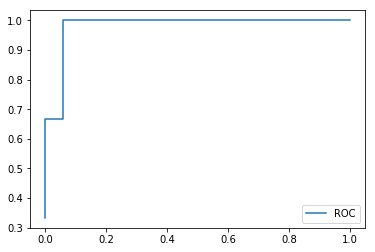

CONFUSION MATRIX 4mgn.cif1_B
[[20  0]
 [ 1  3]]

AUC =  0.9624999999999999


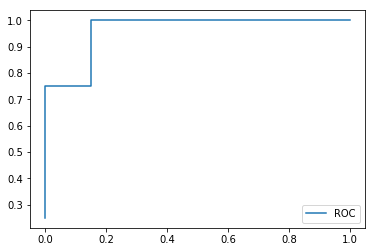

CONFUSION MATRIX 1xjr.cif1_A
[[1 0]
 [0 1]]

AUC =  1.0


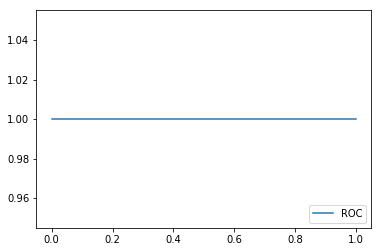

CONFUSION MATRIX 2a43.cif1_A
[[3]]

ERROR Only one class present in y_true. ROC AUC score is not defined in that case. 2a43.cif1_A


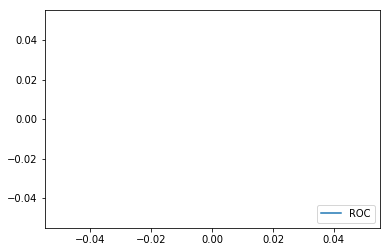

CONFUSION MATRIX 5e81.cif1_3L
[[1 1]
 [0 1]]

AUC =  1.0


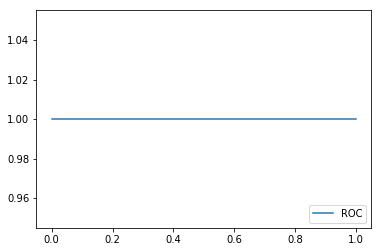

CONFUSION MATRIX 1ser.cif1_T
[[16  1]
 [ 3  0]]

AUC =  0.7647058823529411


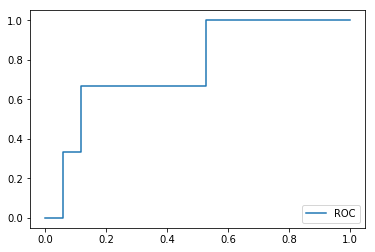

CONFUSION MATRIX 3r9x.cif1_C
[[2 0]
 [0 1]]

AUC =  1.0


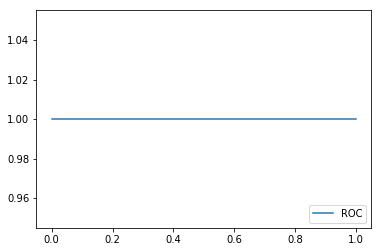

CONFUSION MATRIX 2dlc.cif1_Y
[[7 1]
 [0 2]]

AUC =  0.875


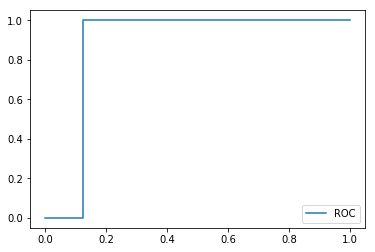

CONFUSION MATRIX 3lqx.cif1_B
[[1 0]
 [0 1]]

AUC =  1.0


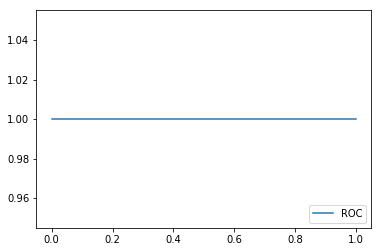

CONFUSION MATRIX 5mmm.cif1_z
[[16  1]
 [ 0  3]]

AUC =  1.0


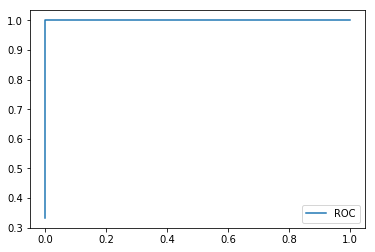

CONFUSION MATRIX 5tbw.cif1_AS
[[40  1]
 [ 0  7]]

AUC =  0.9965156794425087


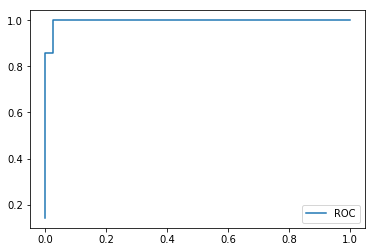

CONFUSION MATRIX 3k0j.cif1_E
[[8 2]
 [0 2]]

AUC =  1.0


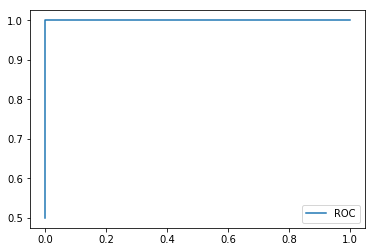

CONFUSION MATRIX 5e6m.cif1_C
[[21  2]
 [ 1  4]]

AUC =  0.8695652173913044


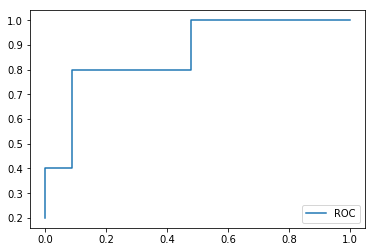

CONFUSION MATRIX 4lck.cif1_F
[[25  1]
 [ 3  2]]

AUC =  0.9615384615384616


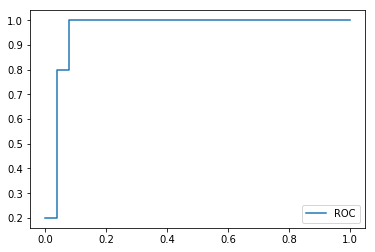

CONFUSION MATRIX 2zzm.cif1_B
[[5 0]
 [1 0]]

AUC =  0.8


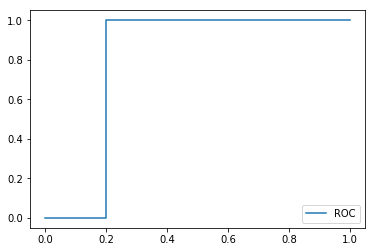

CONFUSION MATRIX 5t5h.cif1_E
[[3 0]
 [1 0]]

AUC =  0.6666666666666667


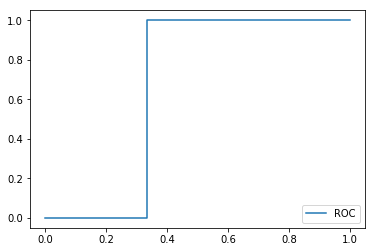

CONFUSION MATRIX 4v88.cif1_A6
[[542   5]
 [ 30  62]]

AUC =  0.9876202209681265


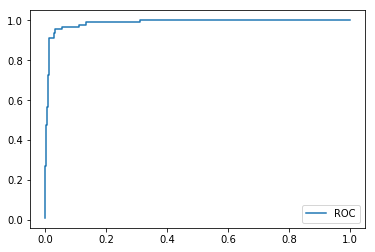

CONFUSION MATRIX 4qk8.cif1_A
[[29  2]
 [ 0  5]]

AUC =  0.9741935483870968


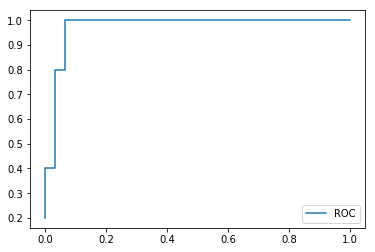

CONFUSION MATRIX 5f5h.cif1_D
[[0 1]
 [0 0]]

ERROR Only one class present in y_true. ROC AUC score is not defined in that case. 5f5h.cif1_D


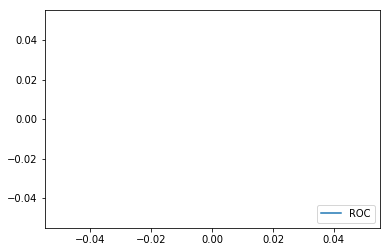

CONFUSION MATRIX 2d6f.cif1_F
[[15  0]
 [ 2  2]]

AUC =  0.9000000000000001


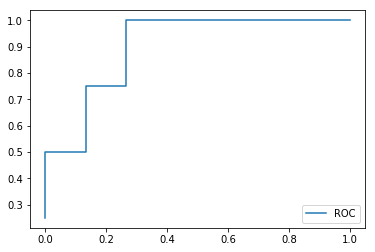

CONFUSION MATRIX 2du3.cif1_D
[[19  1]
 [ 3  1]]

AUC =  0.875


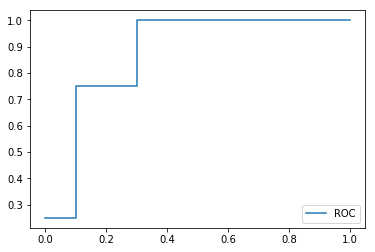

CONFUSION MATRIX 5xh7.cif1_B
[[4]]

ERROR Only one class present in y_true. ROC AUC score is not defined in that case. 5xh7.cif1_B


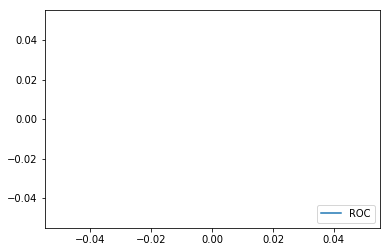

CONFUSION MATRIX 3d2v.cif1_A
[[20  1]
 [ 1  3]]

AUC =  0.988095238095238


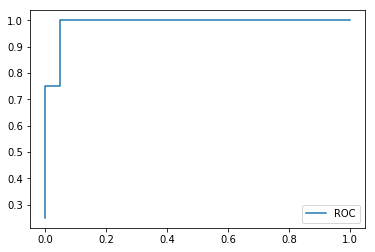

CONFUSION MATRIX 3q50.cif1_A
[[7]]

ERROR Only one class present in y_true. ROC AUC score is not defined in that case. 3q50.cif1_A


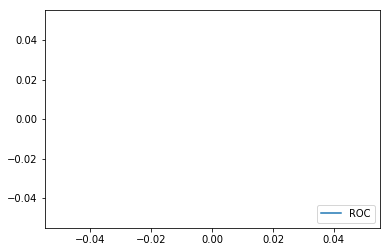

CONFUSION MATRIX 3zgz.cif1_B
[[8 0]
 [0 2]]

AUC =  1.0


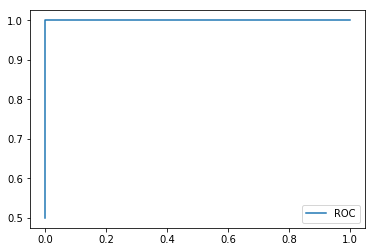

CONFUSION MATRIX 5t5h.cif1_H
[[5 2]
 [0 2]]

AUC =  0.9285714285714286


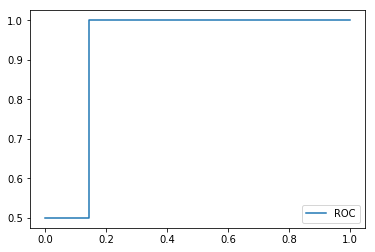

CONFUSION MATRIX 6d9j.cif1_5
[[618   2]
 [ 28  76]]

AUC =  0.9894851116625312


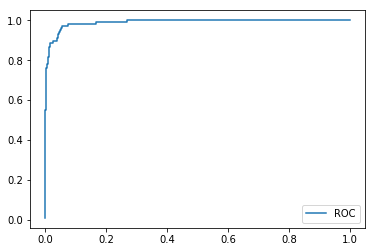

CONFUSION MATRIX 6ek0.cif1_L7
[[40  1]
 [ 0  8]]

AUC =  1.0


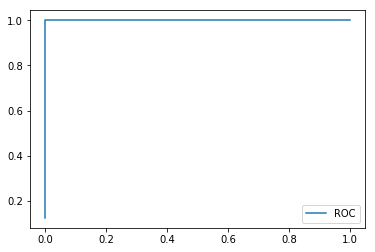

CONFUSION MATRIX 1qtq.cif1_B
[[19  2]
 [ 2  2]]

AUC =  0.8333333333333334


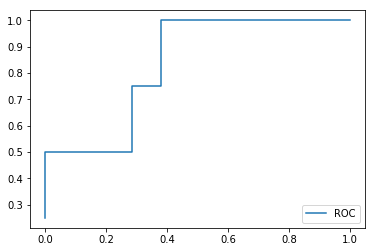

CONFUSION MATRIX 4kr6.cif1_C
[[2 0]
 [1 0]]

AUC =  0.5


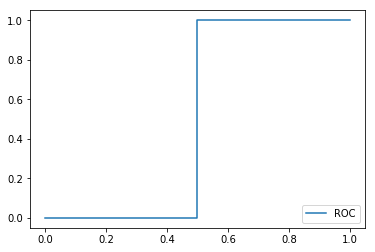

CONFUSION MATRIX 3jcs.cif1_5
[[3 0]
 [1 0]]

AUC =  0.6666666666666667


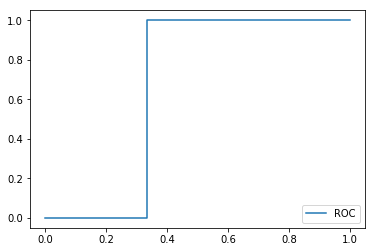

CONFUSION MATRIX 4m4o.cif1_B
[[8 5]
 [0 3]]

AUC =  1.0


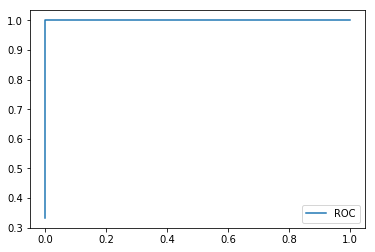

CONFUSION MATRIX 5ml7.cif1_B
[[42  0]
 [ 5  3]]

AUC =  0.9494047619047619


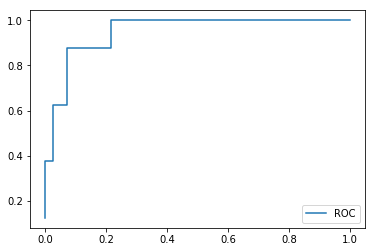

CONFUSION MATRIX 2a64.cif1_A
[[51  1]
 [ 4  5]]

AUC =  0.9572649572649573


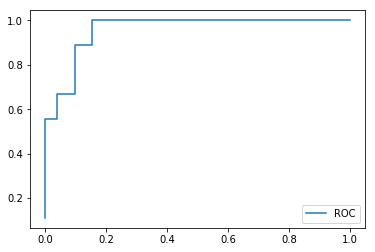

CONFUSION MATRIX 3ivn.cif1_A
[[16  1]
 [ 1  2]]

AUC =  0.8627450980392156


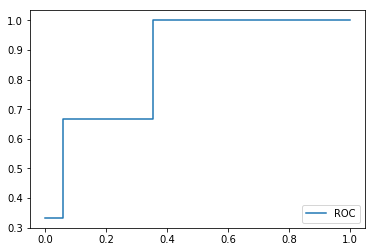

CONFUSION MATRIX 5kk5.cif1_B
[[8 1]
 [0 1]]

AUC =  1.0


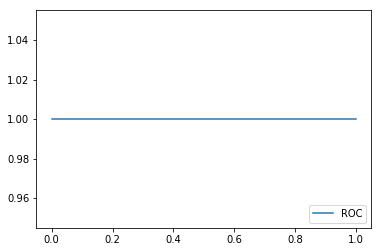

CONFUSION MATRIX 4plx.cif1_A
[[36  2]
 [ 6  0]]

AUC =  0.8070175438596492


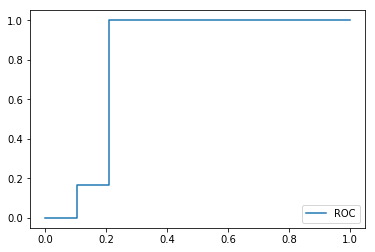

CONFUSION MATRIX 1y26.cif1_X
[[13  0]
 [ 0  3]]

AUC =  1.0


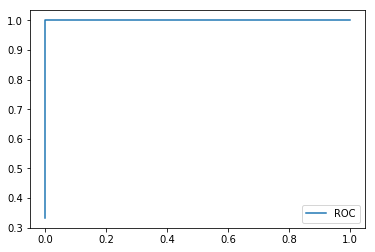

CONFUSION MATRIX 1wz2.cif1_D
[[7 1]
 [2 0]]

AUC =  0.875


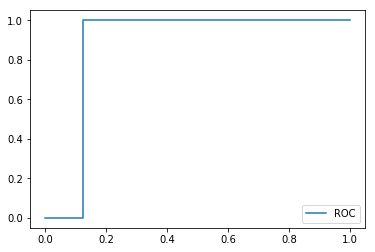

CONFUSION MATRIX 1mfq.cif1_A
[[27  0]
 [ 4  1]]

AUC =  0.962962962962963


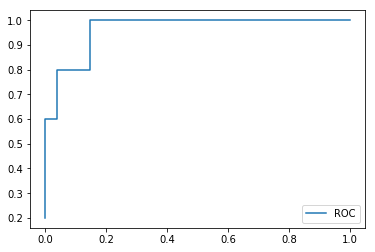

CONFUSION MATRIX 5xyi.cif1_2
[[366   2]
 [ 15  46]]

AUC =  0.9919369208838203


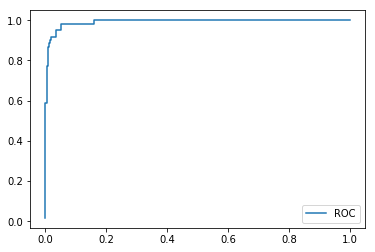

CONFUSION MATRIX 6eri.cif1_BA
[[462   0]
 [ 19  59]]

AUC =  0.9966699966699967


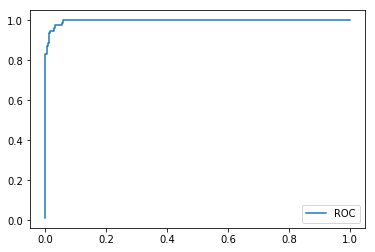

CONFUSION MATRIX 5ccb.cif1_N
[[21  2]
 [ 0  5]]

AUC =  1.0


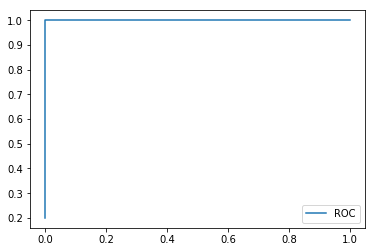

CONFUSION MATRIX 4y1j.cif1_A
[[25  0]
 [ 1  4]]

AUC =  1.0


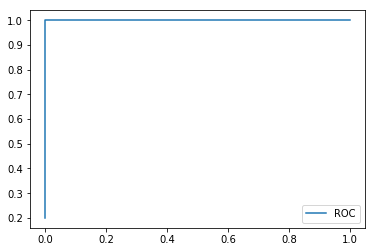

CONFUSION MATRIX 6d9j.cif1_3
[[3 0]
 [0 1]]

AUC =  1.0


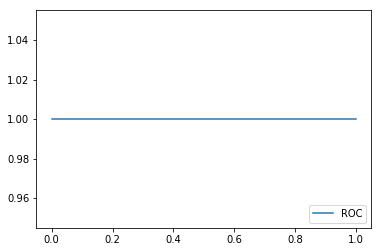

CONFUSION MATRIX 4rzd.cif1_A
[[16  0]
 [ 3  0]]

AUC =  0.9375


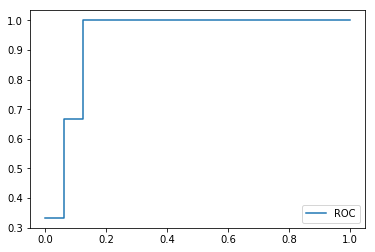

CONFUSION MATRIX 1fir.cif1_A
[[21  0]
 [ 0  4]]

AUC =  1.0


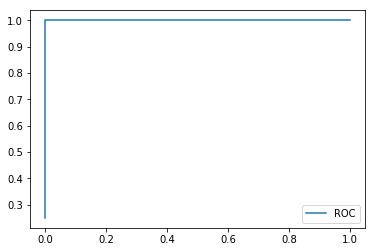

In [11]:
chains = list(set(check_test.pdb_chain.values))

for chain in chains:
    middle_check_test = check_test.loc[check_test['pdb_chain'] == chain]
    middle_target_test = middle_check_test['istriple']
    middle_check_test = middle_check_test.iloc[:, 5:475]
    
    prediction_result = rf_classifier.predict(middle_check_test)
    prediction_proba_result = rf_classifier.predict_proba(middle_check_test)
    
    print("CONFUSION MATRIX", chain)
    print(confusion_matrix(middle_target_test, prediction_result))
    print("")
    fpr, tpr, _ = metrics.roc_curve(middle_target_test,  prediction_proba_result[:, 1])
    try:
        auc = metrics.roc_auc_score(middle_target_test, prediction_proba_result[:, 1])
        print("AUC = ", auc)
    except Exception as e:
        print("ERROR", e, chain)
    plt.plot(fpr, tpr, label="ROC")
    plt.legend(loc=4)
    plt.show()

In [223]:
chains = list(set(check_test.pdb_chain.values))


df.loc[df['column_name'] == some_value]

In [216]:
target_train = check_train.istriple.values
target_test = check_test.istriple.values


In [55]:
check_train = check_train.drop('istriple', axis=1)

In [57]:
check_test = check_test.drop('istriple', axis=1)

In [56]:
check_train.columns

Index(['pdb_chain', 'type', 'dssrs', 'bps', 'dists', 'same12', 'local12',
       'longrange12', 'same23', 'local23',
       ...
       's3p5', 'h3p5', 'b3p5', 'i3p5', 'j3p5', 'lc3p5', 'li3p5', 'lp3p5',
       'fl3p5', 'fed3p5'],
      dtype='object', length=476)

In [217]:
#middle check of shuffle
a = Counter(list(check_train.pdb_chain.values))
b = Counter(list(check_test.pdb_chain.values))

In [61]:
#check_train - target train
#check_test - target_test
check_train = check_train.iloc[:, 5:475]
check_test = check_test.iloc[:, 5:475]

In [218]:
a

Counter({'1c0a.cif1_B': 38,
         '1e8o.cif1_E': 2,
         '1evv.cif1_A': 23,
         '1f1t.cif1_A': 8,
         '1f7u.cif1_B': 11,
         '1fir.cif1_A': 25,
         '1gax.cif1_D': 19,
         '1h3e.cif1_B': 10,
         '1h4s.cif1_T': 33,
         '1i6u.cif1_C': 12,
         '1il2.cif1_C': 22,
         '1j2b.cif1_C': 4,
         '1kh6.cif1_A': 3,
         '1kog.cif1_O': 14,
         '1kxk.cif1_A': 7,
         '1l2x.cif1_A': 5,
         '1mji.cif1_D': 15,
         '1mzp.cif1_B': 19,
         '1nbs.cif1_B': 67,
         '1qf6.cif1_B': 26,
         '1qu2.cif1_T': 19,
         '1s03.cif1_B': 5,
         '1s03.cif1_A': 14,
         '1ser.cif1_T': 20,
         '1u0b.cif1_A': 26,
         '1u9s.cif1_A': 69,
         '1un6.cif1_F': 9,
         '1wz2.cif1_D': 10,
         '1y27.cif1_X': 18,
         '1yfg.cif1_A': 38,
         '2a43.cif1_A': 3,
         '2a64.cif1_A': 61,
         '2azx.cif1_D': 25,
         '2bte.cif1_B': 10,
         '2csx.cif1_C': 23,
         '2d6f.cif1_F': 19,
 

# Модель RandomForestClassifier

In [4]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

In [100]:
rf_classifier.fit(check_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [101]:
prediction_result = rf_classifier.predict(check_test)

In [244]:
importances = rf_classifier.feature_importances_

In [102]:
print(classification_report(target_test, prediction_result))
print(accuracy_score(target_test, prediction_result))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      8593
          1       0.90      0.73      0.81      1484

avg / total       0.95      0.95      0.95     10077

0.9488935198967947


In [104]:
from sklearn.metrics import confusion_matrix
df_confusion = pd.crosstab(target_test, prediction_result, rownames=['Actual'], colnames=['Predicted'], margins=True)

In [162]:
tn, fp, fn, tp = confusion_matrix(target_test, prediction_result).ravel()
(tn, fp, fn, tp)

(8479, 114, 401, 1083)

In [15]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap="YlGnBu"):  #"YlGnBu" plt.cm.gray_r
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    print("CONFUSION MATRIX")
    print(df_confusion)
    a = itertools.product(range(df_confusion.shape[0]), range(df_confusion.shape[1]))
    for i, j in itertools.product(range(df_confusion.shape[0]), range(df_confusion.shape[1])):
        if i == 2:
            i_ = 'All'
        else:
            i_ = i
        if j == 2:
            j_ = 'All'
        else:
            j_ = j
        plt.text(i, j, df_confusion[i_][j_], horizontalalignment="center", color='black')
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)
    plt.show()

In [253]:
len(target_test), len(prediction_result)

(7861, 6883)

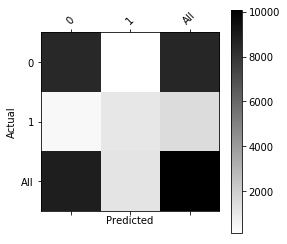

In [105]:
plot_confusion_matrix(target_test, prediction_result)

In [128]:
df_confusion

Predicted,0,1,All
Actual,,,
0,8479,114,8593
1,401,1083,1484
All,8880,1197,10077


In [147]:
# features importances

importances = rf_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(check_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1,  check_train.columns[indices[f]], importances[indices[f]]))


Feature ranking:
1. feature longrange13 (0.119534)
2. feature longrange12 (0.073529)
3. feature same13 (0.072003)
4. feature longrange23 (0.070585)
5. feature same12 (0.059425)
6. feature same23 (0.057597)
7. feature local13 (0.019279)
8. feature local23 (0.016617)
9. feature s1 (0.012341)
10. feature s3 (0.011082)
11. feature local12 (0.009530)
12. feature lc1 (0.006435)
13. feature lc3 (0.006227)
14. feature s2 (0.005344)
15. feature fl1 (0.004630)
16. feature fl2 (0.004530)
17. feature fl3m1 (0.004527)
18. feature fl1p3 (0.004396)
19. feature fl3 (0.004359)
20. feature h3m1 (0.004269)
21. feature h2p4 (0.003947)
22. feature fl2p1 (0.003816)
23. feature fl1p2 (0.003778)
24. feature h3m2 (0.003669)
25. feature fl2m3 (0.003660)
26. feature fl2p4 (0.003641)
27. feature fl2p2 (0.003612)
28. feature fl3p1 (0.003560)
29. feature fl2m1 (0.003508)
30. feature lc2 (0.003454)
31. feature fl2p5 (0.003349)
32. feature fl3p2 (0.003336)
33. feature fl3m5 (0.003309)
34. feature fed1 (0.003205)
35. 

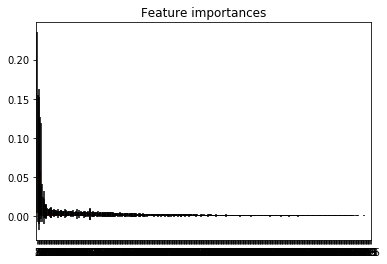

In [148]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(check_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(check_train.shape[1]), indices)
plt.xlim([-1, check_train.shape[1]])
plt.show()

In [125]:
check_train.columns[1]

'local12'

# Кросс-валидация

1) запустить отдельно стандартную кросс-валидацию без групшафл, с 15 сплитами, вывести confusion чего получилось
2) с групшафл тоже сделать 15 сплитов, для каждого сохраняя списки структур (как у тебя в ячейке 44, где middle check of shuffle) и confusion



In [135]:
#Стратегии проведения кросс-валидации
#KFold

for train_indices, test_indices in cross_validation.KFold(10, n_folds = 2, shuffle=True, random_state=0):
    print (train_indices, test_indices)

[0 3 5 6 7] [1 2 4 8 9]
[1 2 4 8 9] [0 3 5 6 7]


In [13]:
#используемая модель
rf_classifier_cv = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

In [151]:
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=10)


In [152]:
#без групп
results = cross_val_score(rf_classifier_cv, triplexes_data, triplexes_target, cv=kf)

In [153]:
#Array of scores of the estimator for each run of the cross validation.
print(results)

[0.92388146 0.93463103 0.93695526 0.94509006 0.94334689 0.96338274
 0.95321128 0.9471084  0.9581517  0.96018599]


In [158]:
#с группами по pdb_chain
results_groups = cross_val_score(rf_classifier_cv, triplexes_data, triplexes_target, groups=list(triplexes.pdb_chain.values), cv=kf)

In [160]:
#REMARK ЗДЕСЬ ПОХОДУ ГРУППЫ НЕ РАБОТАЮТ

print(results_groups)

[0.92388146 0.93463103 0.93695526 0.94509006 0.94334689 0.96338274
 0.95321128 0.9471084  0.9581517  0.96018599]


# 5 ФОЛДОВ

In [189]:
kf = cross_validation.KFold(len(triplexes_target), n_folds=5)
for train_index, test_index in kf:
    X_train, X_test = triplexes_data.loc[train_index], triplexes_data.loc[test_index]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]
    rf_classifier_cv.fit(X_train, y_train)
    prediction_result = rf_classifier_cv.predict(X_test)
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, prediction_result))
    print("")
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY", accuracy_score(y_test, prediction_result))
    print("-----------------")

CONFUSION MATRIX
[[5699  135]
 [ 341  708]]

REPORT
             precision    recall  f1-score   support

          0       0.94      0.98      0.96      5834
          1       0.84      0.67      0.75      1049

avg / total       0.93      0.93      0.93      6883

ACCURACY 0.9308441086735435
-----------------
CONFUSION MATRIX
[[5787   77]
 [ 339  680]]

REPORT
             precision    recall  f1-score   support

          0       0.94      0.99      0.97      5864
          1       0.90      0.67      0.77      1019

avg / total       0.94      0.94      0.94      6883

ACCURACY 0.9395612378323406
-----------------
CONFUSION MATRIX
[[5814   49]
 [ 274  746]]

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      5863
          1       0.94      0.73      0.82      1020

avg / total       0.95      0.95      0.95      6883

ACCURACY 0.953072788028476
-----------------
CONFUSION MATRIX
[[5785   60]
 [ 319  719]]

REPORT
          

In [264]:
gss = GroupShuffleSplit(n_splits=5, test_size=0.3)
# train_dataset_gss_1,test_dataset_gss_1 = next(gss.split(X=triplexes, y=triplexes['istriple'], groups=triplexes.pdb_chain.values))
# train_dataset_gss_2,test_dataset_gss_2 = next(gss.split(X=triplexes, y=triplexes['istriple'], groups=triplexes.pdb_chain.values))


for i in range(5):
    train_index, test_index = next(gss.split(X=triplexes, y=triplexes['istriple'], groups=triplexes.pdb_chain.values))
    X_train, X_test = triplexes_data.loc[list(train_index)], triplexes_data.loc[test_index]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]
    
    a = Counter(list(triplexes.loc[list(train_index)].pdb_chain.values))
    b = Counter(list(triplexes.loc[list(test_index)].pdb_chain.values))
    
    for key in a:
        if key in b.keys():
            print("FUUUUUUUUU")
    
    rf_classifier_cv.fit(X_train, y_train)
    prediction_result = rf_classifier_cv.predict(X_test)
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, prediction_result))
    print("")
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY", accuracy_score(y_test, prediction_result))
    print("-----------------")

CONFUSION MATRIX
[[9153  116]
 [ 482 1117]]

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      9269
          1       0.91      0.70      0.79      1599

avg / total       0.94      0.94      0.94     10868

ACCURACY 0.9449760765550239
-----------------
CONFUSION MATRIX
[[8750   93]
 [ 445 1087]]

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      8843
          1       0.92      0.71      0.80      1532

avg / total       0.95      0.95      0.95     10375

ACCURACY 0.948144578313253
-----------------
CONFUSION MATRIX
[[9851  102]
 [ 530 1189]]

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      9953
          1       0.92      0.69      0.79      1719

avg / total       0.94      0.95      0.94     11672

ACCURACY 0.9458533241946538
-----------------
CONFUSION MATRIX
[[10516    92]
 [  569  1259]]

REPORT
      

# КРОСС-ВАЛИДАЦИЯ ПО ГРУППАМ KFoldGroup

In [7]:
from sklearn.model_selection import GroupKFold

In [201]:
#variant
# import scikitplot as skplt


# y_true = # ground truth labels
# y_probas = # predicted probabilities generated by sklearn classifier
# skplt.metrics.plot_roc_curve(y_true, y_probas)
# plt.show()

In [16]:
def probability_density(y_prob, y):
    
    kde1 = gaussian_kde(y_prob[y == 1])
    kde2 = gaussian_kde(y_prob[y == 0])
    
    x1 = np.linspace(np.min(y_prob[y == 1]),np.max(y_prob[y == 1]),500)
    x2 = np.linspace(np.min(y_prob[y == 0]),np.max(y_prob[y == 0]),500)
    
    try:
        treshold = brentq(lambda x : kde1(x) - kde2(x), x2[np.argmax(kde1(x1))], x1[np.argmax(kde2(x2))])
    except ValueError:
        treshold = 0.5
        
    plt.fill_between(x1,kde1(x1),0, color='darkblue', alpha = 0.5, label = 'Triplexes')
    plt.fill_between(x2,kde2(x2), 0, color='darkgrey', alpha = 0.5, label = 'Non-triplexes')
    plt.axvline(x1[np.argmax(kde1(x1))], color='black', linestyle='--', alpha = 0.5)
    plt.axvline(x2[np.argmax(kde2(x2))], color='black', linestyle='--', alpha = 0.5)
    plt.axvline(treshold, color='black', linestyle='-.', alpha = 0.7, label = str(round(treshold,2)))
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title('Probability Distributions')
    plt.xlabel('Probabilities')
    plt.show()


# НА 5 ФОЛДАХ СТРОИМ CONFUSION MATRIX ПО КАЖДОЙ ГРУППЕ + ОБЩУЮ МАТРИЦУ. 

# ТАКЖЕ СТРОИМ ROC И СЧИТАЕМ AUC ДЛЯ TRAIN И TEST (ЧТОБЫ СРАВНИТЬ)

TEST_GROUPS Counter({'3j7q.cif1_5': 1319, '3j79.cif1_A': 965, '3j7p.cif1_S2': 766, '6ha1.cif1_a': 644, '4lfb.cif1_A': 584, '3j7a.cif1_A': 486, '5xyi.cif1_2': 429, '6d9j.cif1_2': 382, '1u6b.cif1_B': 70, '1nbs.cif1_B': 67, '2a64.cif1_A': 61, '4v9f.cif1_9': 59, '3pdr.cif1_X': 53, '6ek0.cif1_L7': 49, '4r4v.cif1_A': 44, '5fjc.cif1_A': 41, '6d90.cif1_4': 38, '1h4s.cif1_T': 33, '4aob.cif1_A': 33, '3iwn.cif1_A': 32, '4lck.cif1_F': 31, '2der.cif1_D': 30, '5e6m.cif1_C': 28, '3j79.cif1_C': 27, '1u0b.cif1_A': 26, '6az3.cif1_4': 26, '1qtq.cif1_B': 25, '3kfu.cif1_L': 25, '1n78.cif1_C': 24, '5l4o.cif1_A': 24, '2gdi.cif1_X': 23, '3ski.cif1_A': 22, '2qus.cif1_A': 21, '2xd0.cif1_W': 21, '3la5.cif1_A': 20, '4gcw.cif1_B': 20, '5ns3.cif1_C': 20, '1mzp.cif1_B': 19, '1qu2.cif1_T': 19, '4tue.cif1_QV': 19, '4lvw.cif1_A': 18, '4y1m.cif1_B': 18, '1mms.cif1_C': 17, '5e81.cif1_2K': 17, '1hc8.cif1_C': 16, '3icq.cif1_E': 16, '5e81.cif1_1K': 15, '1i6u.cif1_C': 12, '2zni.cif1_C': 12, '3k0j.cif1_E': 12, '4v7m.cif1_AY':

111 A.U.19.A.U.24.A.A.46. -_cWW_tWH 12.36_10.35_9.49 PROBA:  0.416409204795247
111 A.U.25.A.C.42.A.G.47. -_cWW_cWH 11.7_10.45_9.59 PROBA:  0.3589384172969705
CONFUSION MATRIX By chain:  2qus.cif1_A
[[17  0]
 [ 2  2]]

CONFUSION MATRIX By chain:  1hc8.cif1_C
[[13  0]
 [ 0  3]]

111 A.G.29.A.A.37.A.C.41. tHW_-_cWW 12.12_13.19_10.92 PROBA:  0.4664459175586401
112 A.G.10.A.G.22.A.G.45. -_-_cHS 18.19_14.69_8.52 PROBA:  0.5235537730958988
CONFUSION MATRIX By chain:  5l4o.cif1_A
[[19  1]
 [ 1  3]]

CONFUSION MATRIX By chain:  6dn2.cif1_X
[[1 0]
 [0 1]]

111 A.A.12.A.G.43.A.C.59. cSS_cWW_- 5.59_10.65_8.61 PROBA:  0.21344790410573225
112 A.G.32.A.G.35.A.A.61. -_-_- 7.61_15.51_11.13 PROBA:  0.6695505524201133
112 A.G.23.A.U.31.A.A.62. -_-_tSW 7.81_9.3_9.66 PROBA:  0.7103199882900494
112 A.A.36.A.G.43.A.C.59. -_cWW_- 19.48_10.65_18.42 PROBA:  0.6140744445451116
123 A.G.21.A.A.22.A.G.32. -_-_- 5.93_7.33_7.44 PROBA:  0.5633810137678205
CONFUSION MATRIX By chain:  4aob.cif1_A
[[24  4]
 [ 1  4]]

110

111 S2.A.1695.S2.C.1703.S2.A.1832. -_cWW_tWS 7.5_10.49_8.9 PROBA:  0.1624993760221546
111 S2.C.1705.S2.G.1829.S2.A.1851. cWW_tSS_- 10.76_8.22_5.55 PROBA:  0.4989907354378731
111 S2.U.1720.S2.U.1812.S2.A.1813. -_cWH_cWW 14.61_6.22_10.3 PROBA:  0.2075405578413869
111 S2.U.1840.S2.C.1841.S2.G.1858. -_cWW_cWW 5.25_10.6_13.51 PROBA:  0.4751321333758413
112 S2.A.664.S2.C.1163.S2.A.1196. cWW_-_- 10.16_22.23_19.16 PROBA:  0.629695335176836
CONFUSION MATRIX By chain:  3j7p.cif1_S2
[[653   3]
 [ 42  68]]

111 A.A.55.A.A.99.A.U.393. -_cSS_cWW 10.75_5.58_10.19 PROBA:  0.22715012541893087
111 A.C.62.A.U.81.A.G.250. -_cWH_cWW 14.93_6.56_10.76 PROBA:  0.13669952525369283
111 A.U.70.A.A.74.A.A.290. tWH_cWS_- 10.64_8.74_9.48 PROBA:  0.2214956761498577
111 A.G.71.A.A.291.A.A.295. tSW_tHW_- 10.42_12.75_6.36 PROBA:  0.2843940729115087
100 A.G.294.A.A.295.A.C.297. -_-_- 6.28_10.3_14.29 PROBA:  0.6401864114009619
CONFUSION MATRIX By chain:  2a64.cif1_A
[[51  1]
 [ 4  5]]

CONFUSION MATRIX By chain:  2zy6.ci

CONFUSION MATRIX By chain:  3k0j.cif1_E
[[8 2]
 [0 2]]

111 2.A.10.2.A.952.2.A.1108. cWW_tSW_cWS 12.17_9.05_5.6 PROBA:  0.06715176842966596
111 2.U.30.2.A.399.2.A.516. tWH_cWS_- 9.59_9.51_8.37 PROBA:  0.31069553488520363
111 2.A.45.2.U.87.2.A.316. cHS_cWW_- 7.66_10.6_12.33 PROBA:  0.3922780798529544
111 2.U.62.2.A.75.2.A.140. cWW_cSW_- 10.05_6.76_11.31 PROBA:  0.18431099736599535
111 2.G.294.2.G.307.2.A.604. tHW_-_tSW 11.05_19.57_9.59 PROBA:  0.3326367537624171
111 2.A.470.2.A.478.2.U.512. -_cSS_cWW 12.63_4.13_10.5 PROBA:  0.4723010728539427
111 2.A.707.2.G.745.2.A.808. cWW_tSS_- 13.22_4.9_11.47 PROBA:  0.14561945506436164
111 2.U.728.2.G.816.2.C.828. cSS_cWW_- 6.4_10.78_8.7 PROBA:  0.4448363461930915
111 2.G.798.2.G.1554.2.C.1567. tSS_cWW_- 8.03_11.08_6.34 PROBA:  0.44256198834694094
111 2.U.801.2.A.840.2.C.932. cWW_-_cSW 10.55_11.42_7.87 PROBA:  0.49729115909183386
111 2.G.980.2.C.1277.2.A.1407. cWW_cSS_- 10.57_4.69_13.3 PROBA:  0.3561458130978305
111 2.A.1011.2.G.1360.2.A.1403. tWS_

AUC_TRAIN =  0.9949931924639648

AUC =  0.982421165634939


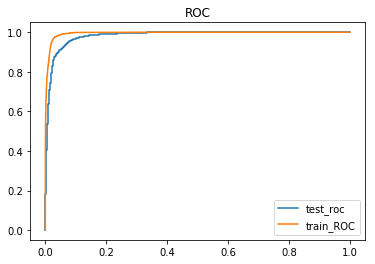

Probability density for train


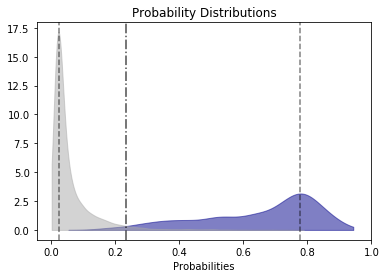

Probability density for test


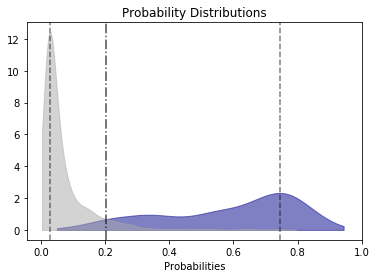


[[5789   74]
 [ 320  700]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          5789   74  5863
1           320  700  1020
All        6109  774  6883


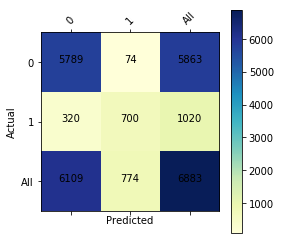


REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      5863
          1       0.90      0.69      0.78      1020

avg / total       0.94      0.94      0.94      6883

ACCURACY =  0.9427575185238994
-----------------
TEST_GROUPS Counter({'4v9f.cif1_0': 1153, '4ioa.cif1_X': 990, '5mrc.cif1_A': 831, '6d9j.cif1_5': 724, '5o5j.cif1_A': 574, '3jam.cif1_2': 506, '5mrc.cif1_aa': 418, '5t5h.cif1_A': 340, '4p95.cif1_A': 86, '1u9s.cif1_A': 69, '3igi.cif1_A': 63, '4gxy.cif1_A': 60, '5j7l.cif1_DB': 57, '5ml7.cif1_B': 50, '5xym.cif1_B': 47, '6ha1.cif1_B': 41, '4yaz.cif1_R': 38, '4oqu.cif1_A': 35, '4prf.cif1_B': 33, '1mfq.cif1_A': 32, '3hhn.cif1_E': 31, '3v7e.cif1_C': 30, '3u4m.cif1_B': 29, '3wqy.cif1_C': 27, '4qlm.cif1_A': 27, '1qf6.cif1_B': 26, '1fir.cif1_A': 25, '3d2v.cif1_A': 25, '4jrc.cif1_B': 25, '2du3.cif1_D': 24, '5mgp.cif1_x': 23, '1il2.cif1_C': 22, '5tbw.cif1_4': 22, '3amu.cif1_B': 21, '5t5h.cif1_C': 21, '3ivn.cif1_A': 20, '5wwt.cif1_C

CONFUSION MATRIX By chain:  3agv.cif1_S
[[1 0]
 [0 1]]

110 A.G.10.A.A.29.A.U.39. -_-_- 13.28_16.86_10.49 PROBA:  0.5717645051250072
111 A.G.13.A.C.26.A.U.59. cWW_-_cSS 10.74_8.76_6.68 PROBA:  0.2809778532212984
CONFUSION MATRIX By chain:  3d2v.cif1_A
[[20  1]
 [ 1  3]]

111 2.G.10.2.U.1143.2.A.1631. cWW_cWW_- 9.91_11.22_5.77 PROBA:  0.20460610023761888
111 2.A.47.2.U.98.2.A.384. cHS_cWW_- 7.89_10.51_12.11 PROBA:  0.4871473352775929
111 2.A.62.2.C.267.2.G.286. -_cWW_tSS 6.04_10.68_8.49 PROBA:  0.32331261668564865
111 2.U.113.2.A.300.2.G.333. cWW_tSW_- 10.05_9.11_9.58 PROBA:  0.3754538066757258
111 2.U.116.2.A.299.2.A.332. cWW_-_cSS 9.14_9.91_5.88 PROBA:  0.24306456816181277
111 2.A.216.2.U.827.2.A.843. tW._cWW_cWS 11.57_10.6_7.9 PROBA:  0.24852576321503128
111 2.A.218.2.U.829.2.C.841. cHH_-_cWW 9.16_13.49_9.96 PROBA:  0.2601094159533048
111 2.A.221.2.U.832.2.U.838. cHW_-_cWW 8.07_13.92_10.18 PROBA:  0.4687411942877799
111 2.G.362.2.C.380.2.A.755. cWW_cSW_c.H 10.76_9.3_12.29 PROBA:  0.3

CONFUSION MATRIX By chain:  5lzs.cif1_2
[[7 0]
 [0 2]]

111 A.G.14.A.A.30.A.C.65. cSS_-_cWW 5.61_8.24_10.52 PROBA:  0.42125477060178623
111 A.G.15.A.A.60.A.C.64. tHW_-_cWW 12.01_13.63_10.61 PROBA:  0.49564288220822994
112 A.A.60.A.G.63.A.C.64. cWH_-_- 11.58_5.32_13.63 PROBA:  0.5681289160625106
CONFUSION MATRIX By chain:  4znp.cif1_A
[[13  1]
 [ 2  1]]

112 A.G.32.A.U.69.A.C.70. -_cSH_- 8.48_6.97_13.71 PROBA:  0.7602254365876973
112 A.G.32.A.U.69.A.A.71. -_-_cHW 8.48_8.52_12.02 PROBA:  0.7841389340524735
112 A.G.32.A.G.35.A.U.69. -_-_- 12.56_12.87_8.48 PROBA:  0.7744551609356409
CONFUSION MATRIX By chain:  3oxe.cif1_A
[[12  3]
 [ 0  3]]

110 5.G.1886.5.C.1893.5.A.2282. cWW_-_- 10.8_29.75_33.23 PROBA:  0.6437753126986727
111 5.G.24.5.C.27.5.A.56. -_cWW_tWH 11.28_10.06_11.11 PROBA:  0.32615280284298115
111 5.A.34.5.A.47.5.G.1526. tHH_-_cSS 11.23_16.77_5.6 PROBA:  0.0951751160891999
111 5.A.66.5.G.311.5.C.326. tSS_cWW_- 8.19_11.64_6.05 PROBA:  0.4600489195934027
111 5.A.295.5.U.316.5.U.43

111 aa.U.26.aa.A.681.aa.A.981. tSW_-_cWW 8.9_5.28_10.37 PROBA:  0.4435201428594261
111 aa.A.58.aa.U.114.aa.A.319. cHS_cWW_- 7.67_10.64_12.33 PROBA:  0.3443758801066694
111 aa.U.72.aa.G.202.aa.U.222. cSS_cWW_- 6.11_10.43_10.21 PROBA:  0.21143645467761144
111 aa.C.74.aa.G.102.aa.A.155. cWW_tSW_- 10.65_10.13_10.33 PROBA:  0.2465735315112729
111 aa.A.131.aa.G.236.aa.A.267. cWW_tSW_- 12.83_8.34_9.67 PROBA:  0.18249446908225914
111 aa.A.148.aa.U.223.aa.A.224. -_cWH_cWW 15.88_5.54_12.3 PROBA:  0.2176321451043391
111 aa.U.158.aa.G.201.aa.U.223. cHS_cWW_- 5.56_10.7_12.9 PROBA:  0.14066474869610926
111 aa.G.684.aa.G.685.aa.C.945. cSH_-_cWW 6.57_9.76_10.54 PROBA:  0.27207896624989303
111 aa.A.760.aa.G.851.aa.C.861. cWS_cWW_- 9.63_10.67_10.96 PROBA:  0.4850902720709579
111 aa.A.832.aa.G.1603.aa.C.1616. tSS_cWW_- 7.42_10.77_6.28 PROBA:  0.41501236680699377
111 aa.C.1013.aa.G.1265.aa.U.1433. cWW_cSS_- 10.83_7.12_9.11 PROBA:  0.4652243969831877
111 aa.U.1026.aa.A.1039.aa.A.1233. t.W_-_tWW 13.7_11.44_

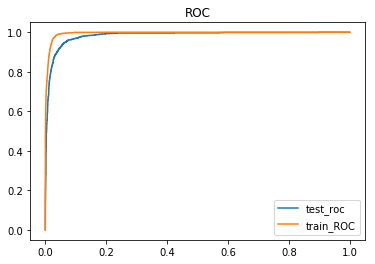

Probability density for train


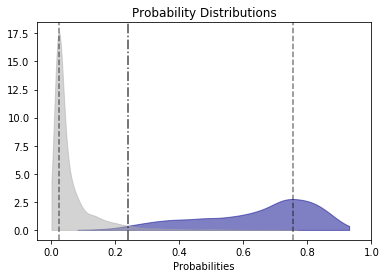

Probability density for test


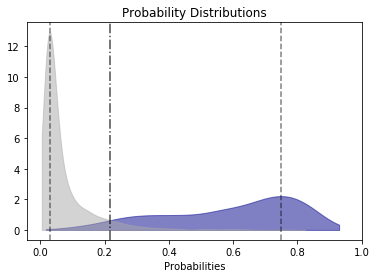


[[5807   63]
 [ 326  687]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          5807   63  5870
1           326  687  1013
All        6133  750  6883


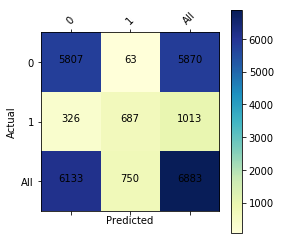


REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      5870
          1       0.92      0.68      0.78      1013

avg / total       0.94      0.94      0.94      6883

ACCURACY =  0.9434839459537993
-----------------
TEST_GROUPS Counter({'4y4o.cif1_2A': 1112, '6eri.cif1_AA': 1013, '5tbw.cif1_1': 937, '4v88.cif1_A6': 639, '5ool.cif1_A': 568, '6eri.cif1_BA': 540, '6az3.cif1_1': 397, '3j9m.cif1_AA': 318, '5oql.cif1_1': 155, '5fdv.cif1_1B': 67, '4wf9.cif1_Y': 60, '3j79.cif1_B': 57, '5xy3.cif1_3': 52, '5tbw.cif1_AS': 48, '3ivk.cif1_M': 43, '1c0a.cif1_B': 38, '4qk8.cif1_A': 36, '3f2x.cif1_X': 33, '4yye.cif1_C': 33, '5lys.cif1_B': 32, '4uyk.cif1_R': 30, '4rdx.cif1_C': 28, '1j1u.cif1_B': 27, '5hr7.cif1_D': 27, '5aj0.cif1_Bv': 26, '6d9j.cif1_8': 26, '2azx.cif1_D': 25, '4mgn.cif1_B': 24, '5axm.cif1_P': 24, '1evv.cif1_A': 23, '5ool.cif1_B': 23, '4qei.cif1_C': 22, '3d0u.cif1_A': 21, '5zwn.cif1_P': 21, '2xdb.cif1_G': 20, '3w3s.cif1_B': 20, '5ju

[[47  3]
 [ 2  8]]

111 1.A.649.1.C.852.1.G.871. -_cWW_tSS 5.81_10.86_8.06 PROBA:  0.2486256634217515
111 1.U.696.1.U.888.1.C.889. cWW_-_cSW 8.56_7.43_7.89 PROBA:  0.47610699234893106
111 1.G.910.1.G.921.1.C.926. cHW_t.W_- 11.14_13.1_10.26 PROBA:  0.41236067423934714
111 1.C.1209.1.A.1524.1.A.1559. cSW_-_cWW 6.2_12.73_10.9 PROBA:  0.37333236886982407
111 1.A.2066.1.G.2173.1.C.2189. tWS_cWW_- 10.59_10.88_9.7 PROBA:  0.36051475202528394
111 1.G.2067.1.C.2174.1.G.2188. tWS_cWW_- 8.94_10.74_10.88 PROBA:  0.36963609719379903
CONFUSION MATRIX By chain:  5oql.cif1_1
[[133   0]
 [  6  16]]

111 A.U.31.A.U.40.A.A.71. -_cWW_cWH 15.05_10.19_8.24 PROBA:  0.349197160909149
111 A.U.32.A.U.39.A.A.72. -_cWW_cWH 15.12_10.14_8.17 PROBA:  0.47226458555286505
CONFUSION MATRIX By chain:  5d5l.cif1_A
[[9 0]
 [2 0]]

110 A.C.2962.A.G.3127.A.A.3130. -_tSH_- 27.79_9.21_31.5 PROBA:  0.6948351904495844
110 A.A.1708.A.U.2035.A.G.2040. -_cWW_- 82.59_9.84_79.25 PROBA:  0.5206741711372254
110 A.C.2793.A.U.3039.A.C.3

111 AA.U.655.AA.U.662.AA.A.1168. tHW_-_cWH 11.31_11.45_8.45 PROBA:  0.4973857545216385
111 AA.C.660.AA.A.1121.AA.G.1170. -_tW._cWW 6.28_12.16_10.46 PROBA:  0.453419512288809
111 AA.U.678.AA.A.860.AA.A.919. tWW_cHS_- 11.24_7.75_9.04 PROBA:  0.39202008233794194
111 AA.A.691.AA.U.716.AA.A.799. cHS_cWW_- 7.77_10.56_12.71 PROBA:  0.29198517246952765
111 AA.G.874.AA.A.881.AA.C.915. -_cSS_cWW 13.23_5.81_10.41 PROBA:  0.41920205894979357
111 AA.A.977.AA.A.1010.AA.C.1065. tWH_tWS_- 12.06_7.9_10.65 PROBA:  0.1730462874334579
111 AA.U.1055.AA.G.1576.AA.C.1589. tWS_cWW_- 7.8_10.75_6.31 PROBA:  0.4078841249629612
111 AA.A.1232.AA.G.1401.AA.A.1444. tWS_-_tHW 10.21_6.39_12.33 PROBA:  0.39169127442317203
111 AA.U.1400.AA.A.1404.AA.G.1445. tWH_tWS_- 9.83_10.46_4.57 PROBA:  0.4405610893295055
111 AA.A.1478.AA.C.1486.AA.A.1565. -_cWW_tWS 7.68_10.17_8.36 PROBA:  0.1337727081725227
CONFUSION MATRIX By chain:  3j9m.cif1_AA
[[272   0]
 [ 10  36]]

111 A.U.31.A.U.40.A.A.71. -_cWW_cWH 15.13_10.25_8.37 PROBA:  

AUC_TRAIN =  0.994883072768095

AUC =  0.9871041400129618


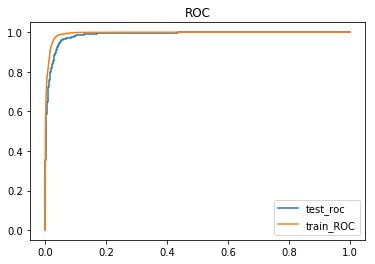

Probability density for train


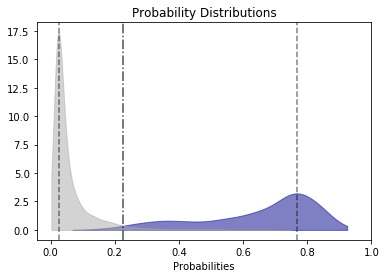

Probability density for test


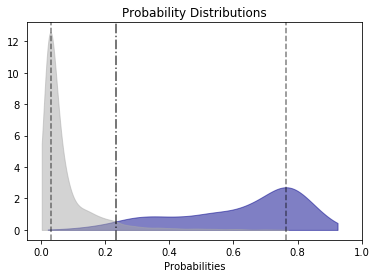


[[5799   69]
 [ 268  747]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          5799   69  5868
1           268  747  1015
All        6067  816  6883


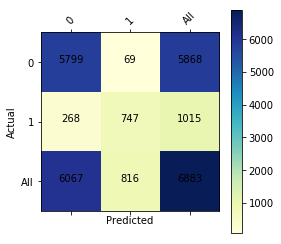


REPORT
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      5868
          1       0.92      0.74      0.82      1015

avg / total       0.95      0.95      0.95      6883

ACCURACY =  0.9510387912247567
-----------------
TEST_GROUPS Counter({'5j7l.cif1_DA': 1103, '6ha1.cif1_A': 1028, '5xxb.cif1_1': 842, '5xy3.cif1_1': 762, '6ek0.cif1_S2': 550, '5xxu.cif1_2': 472, '5ngm.cif1_Aa': 462, '5t5h.cif1_B': 283, '6gaz.cif1_AA': 279, '3j7o.cif1_7': 59, '3mxh.cif1_R': 52, '5t5h.cif1_D': 48, '4plx.cif1_A': 44, '4ycp.cif1_B': 40, '2qwy.cif1_C': 37, '2r8s.cif1_R': 33, '4wj4.cif1_B': 33, '5wt1.cif1_C': 32, '4y1j.cif1_A': 30, '4yco.cif1_D': 29, '5ccb.cif1_N': 28, '3wfs.cif1_A': 27, '6az3.cif1_5': 26, '6ck5.cif1_A': 26, '3al0.cif1_E': 25, '4v8n.cif1_CV': 25, '6eri.cif1_AB': 24, '5d8h.cif1_A': 23, '6gaw.cif1_BB': 23, '5nwq.cif1_A': 22, '5hr6.cif1_C': 21, '5oql.cif1_2': 21, '1ser.cif1_T': 20, '3g9c.cif1_Q': 20, '5xy3.cif1_4': 20, '1b23.cif1_R': 19, '2d6f

CONFUSION MATRIX By chain:  1xjr.cif1_A
[[1 0]
 [0 1]]

111 C.G.14.C.C.19.C.C.47. tSW_tWW_tWW 9.0_10.58_10.38 PROBA:  0.25907300424307433
100 C.U.7.C.G.42.C.G.43. -_-_- 24.86_5.52_21.15 PROBA:  0.5133949626744958
112 C.C.11.C.G.23.C.A.46. cWW_-_- 10.63_13.48_13.02 PROBA:  0.5253166789837387
123 C.U.7.C.C.8.C.A.46. -_-_- 7.98_3.82_5.6 PROBA:  0.648179772050252
CONFUSION MATRIX By chain:  5hr6.cif1_C
[[14  3]
 [ 1  3]]

111 A.G.7.A.C.22.A.C.48. -_tWH_cWW 12.53_10.07_10.69 PROBA:  0.3932741281088335
CONFUSION MATRIX By chain:  5tpy.cif1_A
[[6 0]
 [1 0]]

112 A.C.15.A.U.16.A.A.36. -_cWW_- 5.81_10.45_14.51 PROBA:  0.5044959578156027
112 A.C.15.A.A.35.A.G.37. -_-_cWW 13.65_9.34_10.6 PROBA:  0.7009856152149091
CONFUSION MATRIX By chain:  1s03.cif1_A
[[9 2]
 [0 3]]

110 A.U.8.A.C.22.A.G.29. -_-_cWW 24.49_16.92_10.07 PROBA:  0.6341998238565517
CONFUSION MATRIX By chain:  5de8.cif1_A
[[0 1]
 [0 1]]

111 T.G.9.T.G.13.T.A.22. tHW_tSH_- 10.98_9.29_12.57 PROBA:  0.4647079855668167
111 T.G.15.T.H2U.2

110 S2.G.1229.S2.C.1529.S2.U.1602. cWW_-_- 10.75_24.42_19.41 PROBA:  0.6983166423949547
111 S2.C.35.S2.A.520.S2.A.825. cWW_cSW_- 10.39_5.88_13.0 PROBA:  0.24012611046726584
111 S2.A.46.S2.U.97.S2.A.433. cHS_cWW_- 7.77_10.44_12.0 PROBA:  0.4412405366587306
111 S2.A.60.S2.G.316.S2.C.334. cWS_cWW_- 6.23_11.58_13.63 PROBA:  0.2739748540721756
111 S2.A.61.S2.C.315.S2.G.335. -_cWW_tSS 5.73_10.73_8.59 PROBA:  0.25997839123815
111 S2.G.108.S2.C.353.S2.A.854. cWW_-_tSS 10.41_7.41_7.61 PROBA:  0.28329194070196917
111 S2.C.140.S2.U.176.S2.A.313. -_tWH_cWW 12.33_9.88_10.47 PROBA:  0.16971428958711207
111 S2.G.411.S2.C.429.S2.A.811. cWW_cSW_- 10.63_9.36_12.41 PROBA:  0.2435106161930424
111 S2.G.412.S2.G.425.S2.A.812. tHS_-_tSW 10.62_18.81_9.49 PROBA:  0.4035636077302966
111 S2.A.628.S2.U.1329.S2.G.1500. -_cWW_cWS 14.07_11.13_9.93 PROBA:  0.24199459757651262
111 S2.C.746.S2.G.796.S2.A.798. cWW_-_cSW 10.58_11.21_8.76 PROBA:  0.46969328010620087
111 S2.A.1035.S2.G.1843.S2.C.1856. tSS_cWW_- 7.98_10.91_

111 A.A.10.A.C.37.A.G.61. -_cWW_tSS 5.74_10.54_8.02 PROBA:  0.34056605273060453
CONFUSION MATRIX By chain:  4y1j.cif1_A
[[25  0]
 [ 1  4]]

111 A.A.8.A.G.31.A.G.36. -_tHW_tHS 13.26_11.14_8.45 PROBA:  0.2678592172357706
CONFUSION MATRIX By chain:  3e5c.cif1_A
[[8 0]
 [1 1]]

112 A.C.1182.A.G.1201.A.C.1210. -_cWW_- 8.25_10.17_12.93 PROBA:  0.5160631729714473
CONFUSION MATRIX By chain:  5d8h.cif1_A
[[18  1]
 [ 0  4]]

CONFUSION MATRIX By chain:  4lx6.cif1_A
[[14  0]
 [ 0  3]]

111 B.U.9.B.G.13.B.A.22. tHW_tSH_- 10.51_9.69_12.35 PROBA:  0.48372654493322664
111 B.G.15.B.C.20.AB.C.48. tSW_tWW_tWW 8.87_10.58_10.23 PROBA:  0.20638199251690534
CONFUSION MATRIX By chain:  1h3e.cif1_B
[[8 0]
 [2 0]]

AUC_TRAIN =  0.9946268942741465

AUC =  0.9875610252408636


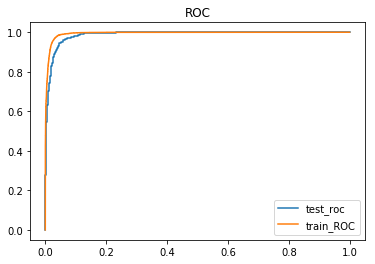

Probability density for train


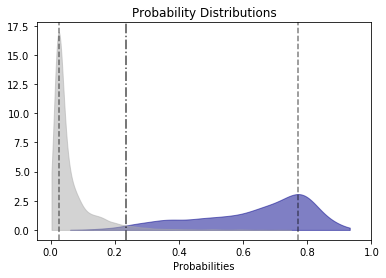

Probability density for test


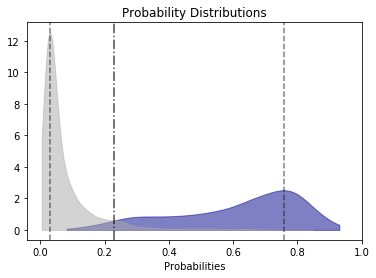


[[5796   74]
 [ 276  737]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          5796   74  5870
1           276  737  1013
All        6072  811  6883


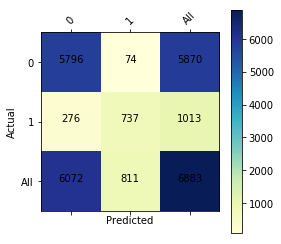


REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      5870
          1       0.91      0.73      0.81      1013

avg / total       0.95      0.95      0.95      6883

ACCURACY =  0.9491500799070173
-----------------
TEST_GROUPS Counter({'5o60.cif1_A': 1041, '6ek0.cif1_L5': 1041, '4wf9.cif1_X': 943, '5j7l.cif1_AA': 651, '6az1.cif1_1': 585, '6gaw.cif1_BA': 543, '5an9.cif1_N': 413, '6az3.cif1_2': 286, '5t2a.cif1_B': 252, '4ioa.cif1_Y': 60, '5xxb.cif1_3': 55, '6az3.cif1_8': 51, '4kqy.cif1_A': 45, '6eri.cif1_Ax': 43, '1yfg.cif1_A': 38, '5t83.cif1_A': 34, '6d9j.cif1_7': 33, '3ndb.cif1_M': 32, '4pr6.cif1_B': 32, '4mgn.cif1_A': 30, '4qk9.cif1_A': 28, '6cb3.cif1_B': 27, '6gaz.cif1_AV': 27, '4p5j.cif1_A': 26, '5u3g.cif1_B': 26, '3dil.cif1_A': 25, '3eph.cif1_E': 24, '3skl.cif1_B': 24, '2csx.cif1_C': 23, '3q3z.cif1_V': 23, '5o2r.cif1_x': 22, '3jbv.cif1_W': 21, '3j7q.cif1_8': 20, '5mmm.cif1_z': 20, '5xxb.cif1_4': 20, '6ek0.cif1_L8': 20, '1gax.

CONFUSION MATRIX By chain:  6ek0.cif1_L5
[[890   2]
 [ 43 106]]

111 S6.G.29.S6.G.31.S6.C.39. cSH_cWW_cWW 8.3_10.52_11.42 PROBA:  0.4895520909998205
CONFUSION MATRIX By chain:  6ek0.cif1_S6
[[14  0]
 [ 1  2]]

111 BA.A.51.BA.C.246.BA.G.346. -_cWW_tSS 6.2_10.59_7.9 PROBA:  0.47195811020070366
111 BA.A.56.BA.U.372.BA.G.377. -_cWW_tWS 11.73_10.18_9.46 PROBA:  0.48784175339210056
111 BA.C.58.BA.G.82.BA.A.1255. cWW_tSH_- 10.6_6.73_11.89 PROBA:  0.24429091151029933
111 BA.U.109.BA.A.199.BA.U.636. -_cWW_cWS 10.69_10.78_6.29 PROBA:  0.33075130786531404
111 BA.A.124.BA.C.251.BA.G.341. cSS_cWW_- 5.86_10.82_13.38 PROBA:  0.30814153083591456
111 BA.A.150.BA.U.198.BA.A.637. cSS_cWW_- 5.62_10.79_13.25 PROBA:  0.2803039436386203
111 BA.A.164.BA.A.1014.BA.G.1030. -_cWW_cW. 9.56_12.57_11.32 PROBA:  0.28335264718284703
111 BA.A.164.BA.C.1015.BA.G.1029. cWS_cWW_- 7.97_10.82_14.33 PROBA:  0.34563818569962057
111 BA.C.241.BA.U.354.BA.A.1055. cWW_cSW_- 11.36_8.71_14.7 PROBA:  0.44258830106077535
111 BA.G.27

110 2.C.776.2.A.814.2.C.961. tWW_-_- 12.37_18.44_12.39 PROBA:  0.636654077804588
110 2.G.90.2.C.91.2.C.579. -_-_cWW 7.23_16.04_10.29 PROBA:  0.758188896028235
111 2.G.396.2.U.432.2.A.559. cWW_cSS_- 10.37_4.71_12.2 PROBA:  0.35355436287089226
111 2.A2M.527.2.A.1397.2.U.1413. -_cWW_cSS 11.2_10.17_4.46 PROBA:  0.4184489749060273
111 2.A.619.2.G.1263.2.U.1304. cSS_cWW_- 5.02_10.92_13.58 PROBA:  0.32201758013126563
111 2.G.780.2.U.811.2.U.1011. cWW_-_cSH 11.06_11.45_8.94 PROBA:  0.16626718104339627
111 2.U.1045.2.G.1051.2.C.1072. -_cWW_cSH 11.64_10.29_7.59 PROBA:  0.4279358286469578
111 2.C.1058.2.G.1076.2.A.1124. cWW_cSS_- 10.61_5.96_8.24 PROBA:  0.4811632400426451
123 2.G.1263.2.U.1301.2.G.1390. -_-_- 17.1_27.28_34.15 PROBA:  0.8241392549564103
CONFUSION MATRIX By chain:  6az3.cif1_2
[[242   3]
 [  6  35]]

111 B.G.10.B.C.29.B.A.72. cWW_-_cSW 10.73_10.33_9.31 PROBA:  0.2999463464381637
111 B.G.11.B.C.29.B.A.71. -_tSW_cSW 9.79_9.48_9.54 PROBA:  0.062398711547691936
CONFUSION MATRIX By chai

CONFUSION MATRIX By chain:  5o60.cif1_A
[[891   1]
 [ 33 116]]

111 E.U.8.E.A.14.E.A.21. tWH_cWS_tSW 9.47_10.23_8.55 PROBA:  0.4818252716321588
111 E.G.15.E.U.47.E.C.48. -_cSH_tWW 14.36_6.01_10.54 PROBA:  0.1537966262760752
112 E.G.9.E.G.12.E.G.22. -_-_- 12.57_14.41_10.88 PROBA:  0.517277208500073
123 E.G.9.E.G.46.E.U.47. -_-_- 3.54_5.32_8.82 PROBA:  0.7096458384224398
CONFUSION MATRIX By chain:  3eph.cif1_E
[[18  2]
 [ 2  2]]

CONFUSION MATRIX By chain:  6cf2.cif1_G
[[3 0]
 [0 1]]

111 B.A.326.B.G.1331.B.U.1349. tWS_cWW_- 8.44_10.76_7.7 PROBA:  0.20260636590757997
111 B.A.415.B.U.611.B.A.964. cSS_cWW_- 5.61_10.21_10.92 PROBA:  0.2571490329063027
111 B.A.464.B.A.1332.B.U.1348. -_cWW_cSS 10.87_9.87_4.55 PROBA:  0.4307365813225043
111 B.C.993.B.G.1011.B.A.1059. cWW_cSS_- 10.56_6.07_8.45 PROBA:  0.46506800194740705
112 B.U.383.B.A.425.B.C.428. -_cSH_- 12.9_8.91_7.61 PROBA:  0.8146734376072717
CONFUSION MATRIX By chain:  5t2a.cif1_B
[[215   1]
 [  4  32]]

111 A.A.20.A.G.57.A.A.60. tWS_-_t

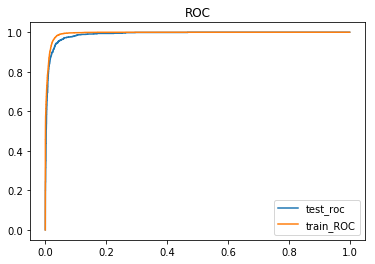

Probability density for train


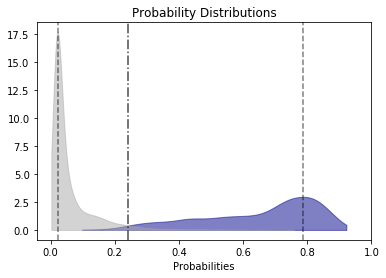

Probability density for test


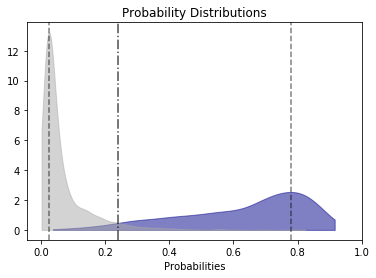


[[5820   50]
 [ 252  761]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          5820   50  5870
1           252  761  1013
All        6072  811  6883


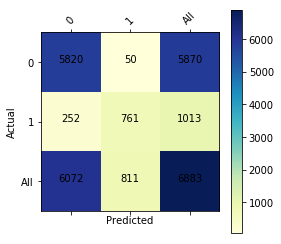


REPORT
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      5870
          1       0.94      0.75      0.83      1013

avg / total       0.96      0.96      0.95      6883

ACCURACY =  0.9561237832340549
-----------------


In [17]:
groups = np.array(triplexes.pdb_chain.values)
group_kfold = GroupKFold(n_splits=5)
#group_kfold.get_n_splits(X, y, groups)

description = ['type', 'dssrs', 'bps', 'dists']

for train_index, test_index in group_kfold.split(triplexes, triplexes_target, groups):
    #triplexes_data = triplexes.iloc[:, 5:475]
    #print(triplexes_data)
    X_train_middle, X_test_middle = triplexes.loc[list(train_index)], triplexes.loc[test_index]
    X_train = X_train_middle.iloc[:, 5:475]
    X_test = X_test_middle.iloc[:, 5:475]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]

    
    a = Counter(list(triplexes.loc[list(train_index)].pdb_chain.values))
    b = Counter(list(triplexes.loc[list(test_index)].pdb_chain.values))
    
    for key in a:
        if key in b.keys():
            print("FUUUUUUUUU")
    print("TEST_GROUPS", Counter(list(triplexes.pdb_chain.loc[test_index])))
    rf_classifier_cv.fit(X_train, y_train)
    
    #prediction by chains
    chains = list(set(X_test_middle.pdb_chain.values))

    print("")
    for chain in chains:
        middle_check_test = X_test_middle.loc[X_test_middle['pdb_chain'] == chain]
        middle_target_test = middle_check_test['istriple']
        middle_check_test_ = middle_check_test.iloc[:, 5:475]
    
        prediction_result_by_chain = rf_classifier_cv.predict(middle_check_test_)
        predict_proba_by_chain = rf_classifier_cv.predict_proba(middle_check_test_)

        
        #PREDICTED PROBABILITIES
        i = 0
        for index, row in middle_check_test.iterrows():
            if middle_target_test[index] != prediction_result_by_chain[i]:
                print(row['type'], row['dssrs'], row['bps'], row['dists'], "PROBA: ", predict_proba_by_chain[i][1])
            i = i + 1

        print("CONFUSION MATRIX By chain: ", chain)
        print(confusion_matrix(middle_target_test, prediction_result_by_chain))
        print("")
    
    #simple prediction
    prediction_result = rf_classifier_cv.predict(X_test)
    prediction_prob = rf_classifier_cv.predict_proba(X_test)
    
    #TRY TO PREDICT TRAIN
    prediction_train = rf_classifier_cv.predict(X_train)
    prediction_prob_train = rf_classifier_cv.predict_proba(X_train)
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train,  prediction_prob_train[:, 1])
    auc_train = metrics.roc_auc_score(y_train, prediction_prob_train[:, 1])
    print("AUC_TRAIN = ", auc_train)
    
    #---------------------------------
    print("")
    fpr, tpr, _ = metrics.roc_curve(y_test,  prediction_prob[:, 1])
    auc = metrics.roc_auc_score(y_test, prediction_prob[:, 1])
    print("AUC = ", auc)
    line_test, = plt.plot(fpr, tpr, label='test_roc')
    line_train, = plt.plot(fpr_train, tpr_train, label='train_roc')
    plt.legend( [line_test, line_train], ['test_roc', 'train_ROC'], loc = 4)
    plt.title("ROC")
    plt.show()
    
    print("Probability density for train")
    probability_density(prediction_prob_train[:, 1], y_train)
    print("Probability density for test")
    probability_density(prediction_prob[:, 1], y_test)
    
    print("")
    print(confusion_matrix(y_test, prediction_result))
    plot_confusion_matrix(pd.crosstab(y_test, prediction_result, rownames=['Actual'], colnames=['Predicted'], margins=True))


    print("")
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY = ", accuracy_score(y_test, prediction_result))
    print("-----------------")


[[5820   50]
 [ 252  761]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          5820   50  5870
1           252  761  1013
All        6072  811  6883


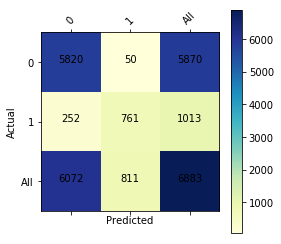

In [306]:
#example of confusion matrix

print(confusion_matrix(y_test, prediction_result))
plot_confusion_matrix(pd.crosstab(y_test, prediction_result, rownames=['Actual'], colnames=['Predicted'], margins=True))

In [33]:
prediction_prob

array([[0.97152524, 0.02847476],
       [0.93307588, 0.06692412],
       [0.32723728, 0.67276272],
       ...,
       [0.85613661, 0.14386339],
       [0.19482893, 0.80517107],
       [0.9792166 , 0.0207834 ]])


AUC_TRAIN =  0.9947658467718578

AUC =  0.98734850088539


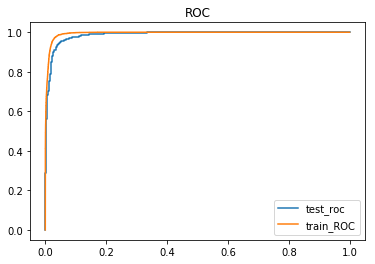

Probability density for train


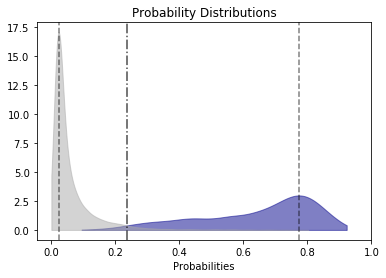

Probability density for test


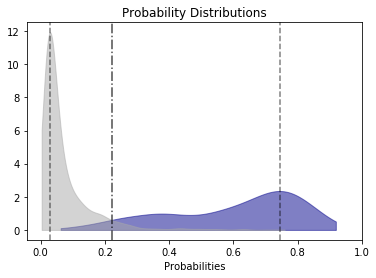


[[2910   25]
 [ 153  354]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          2910   25  2935
1           153  354   507
All        3063  379  3442


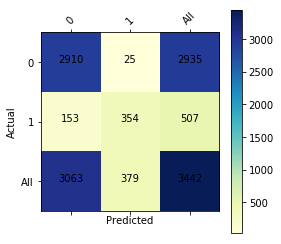

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2935
          1       0.93      0.70      0.80       507

avg / total       0.95      0.95      0.95      3442

ACCURACY 0.9482858803021499
-----------------

AUC_TRAIN =  0.9950956291310071

AUC =  0.97916225651778


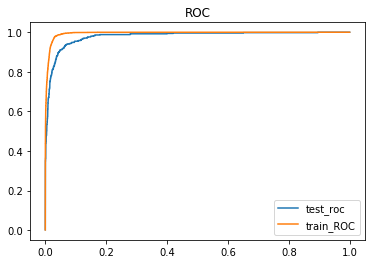

Probability density for train


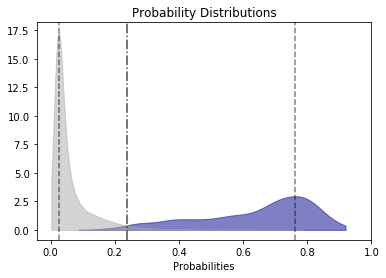

Probability density for test


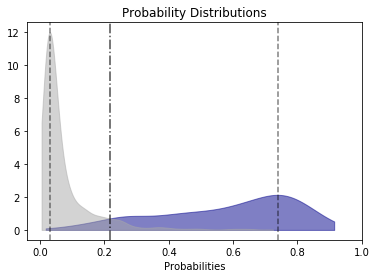


[[2904   31]
 [ 169  338]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          2904   31  2935
1           169  338   507
All        3073  369  3442


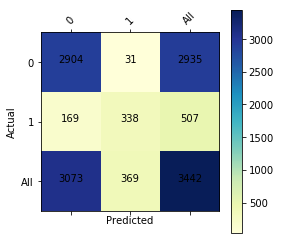

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2935
          1       0.92      0.67      0.77       507

avg / total       0.94      0.94      0.94      3442

ACCURACY 0.9418942475305055
-----------------

AUC_TRAIN =  0.9947462980633504

AUC =  0.9860662815976667


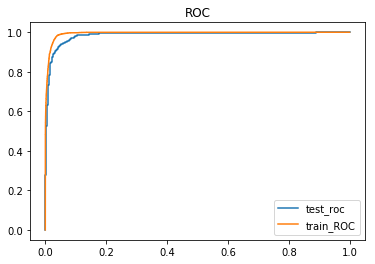

Probability density for train


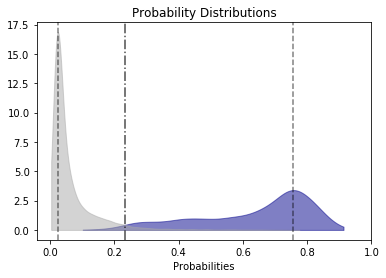

Probability density for test


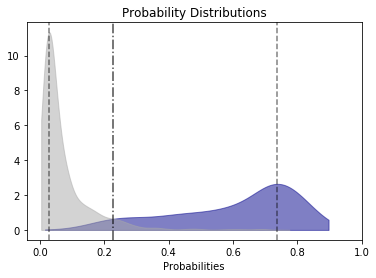


[[2907   28]
 [ 144  363]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          2907   28  2935
1           144  363   507
All        3051  391  3442


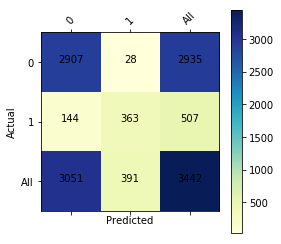

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2935
          1       0.93      0.72      0.81       507

avg / total       0.95      0.95      0.95      3442

ACCURACY 0.9500290528762347
-----------------

AUC_TRAIN =  0.9944156574682177

AUC =  0.9860155438847615


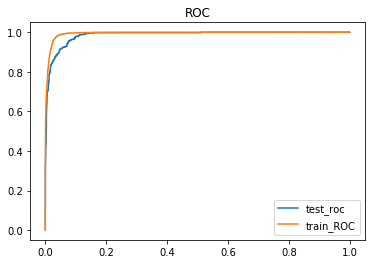

Probability density for train


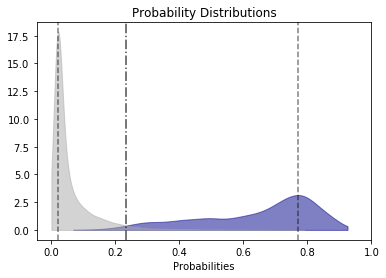

Probability density for test


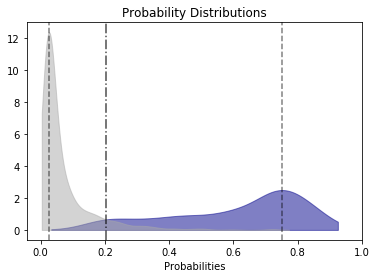


[[2911   24]
 [ 150  357]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          2911   24  2935
1           150  357   507
All        3061  381  3442


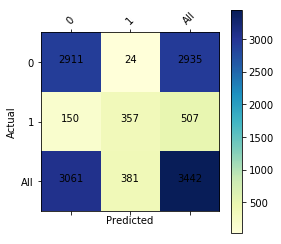

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2935
          1       0.94      0.70      0.80       507

avg / total       0.95      0.95      0.95      3442

ACCURACY 0.9494479953515398
-----------------

AUC_TRAIN =  0.9952512647599568

AUC =  0.9862488838814734


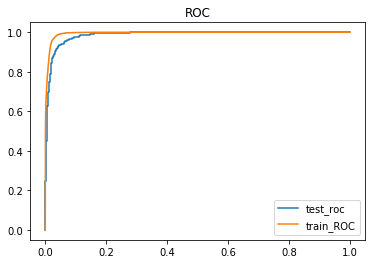

Probability density for train


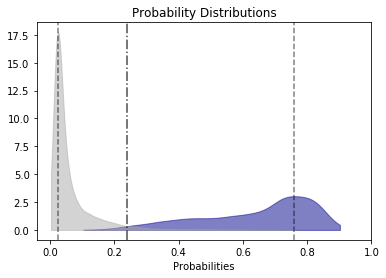

Probability density for test


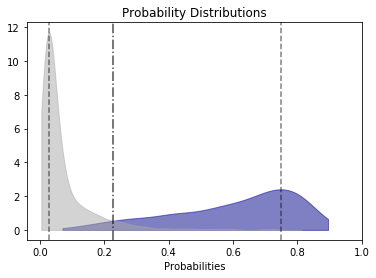


[[2898   35]
 [ 142  367]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          2898   35  2933
1           142  367   509
All        3040  402  3442


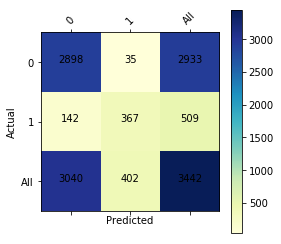

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2933
          1       0.91      0.72      0.81       509

avg / total       0.95      0.95      0.95      3442

ACCURACY 0.9485764090644974
-----------------

AUC_TRAIN =  0.9947354440169448

AUC =  0.9873724234271661


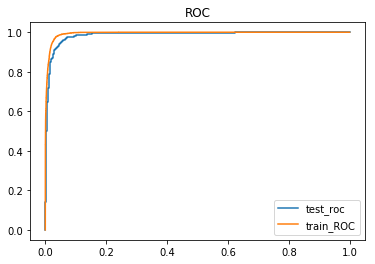

Probability density for train


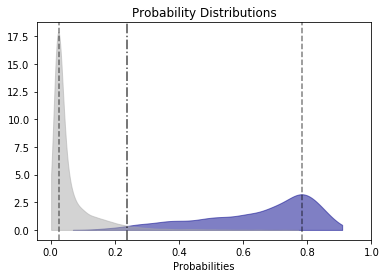

Probability density for test


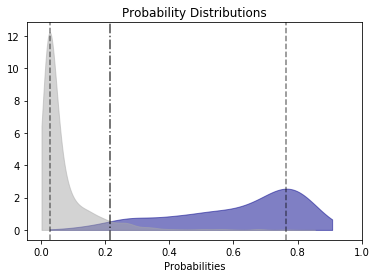


[[2902   32]
 [ 139  368]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          2902   32  2934
1           139  368   507
All        3041  400  3441


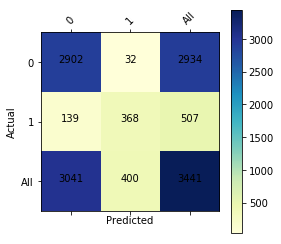

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2934
          1       0.92      0.73      0.81       507

avg / total       0.95      0.95      0.95      3441

ACCURACY 0.9503051438535309
-----------------

AUC_TRAIN =  0.9949375317053738

AUC =  0.9852714562231034


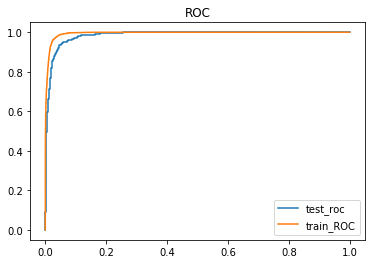

Probability density for train


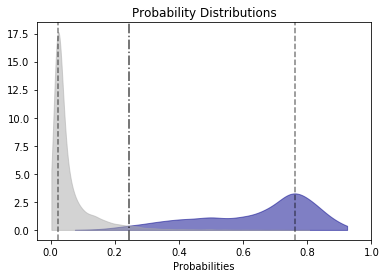

Probability density for test


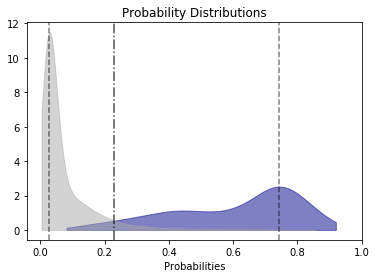


[[2895   38]
 [ 158  350]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          2895   38  2933
1           158  350   508
All        3053  388  3441


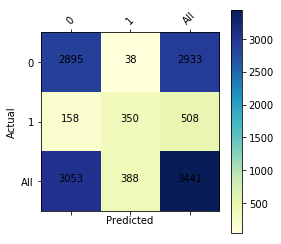

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2933
          1       0.90      0.69      0.78       508

avg / total       0.94      0.94      0.94      3441

ACCURACY 0.943039814007556
-----------------

AUC_TRAIN =  0.9946867452875124

AUC =  0.9869470941873025


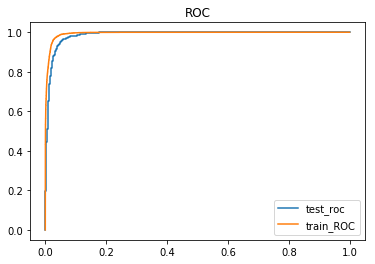

Probability density for train


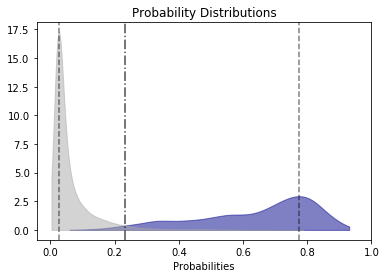

Probability density for test


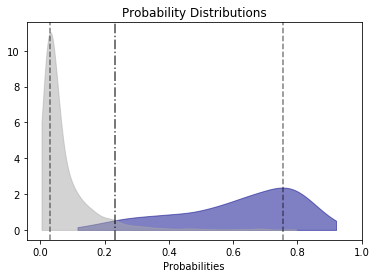


[[2891   41]
 [ 129  380]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          2891   41  2932
1           129  380   509
All        3020  421  3441


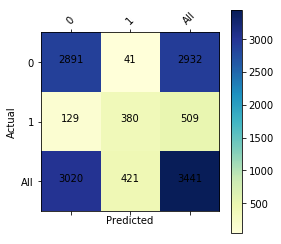

REPORT
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      2932
          1       0.90      0.75      0.82       509

avg / total       0.95      0.95      0.95      3441

ACCURACY 0.95059575704737
-----------------

AUC_TRAIN =  0.9944832316948161

AUC =  0.9894550592993254


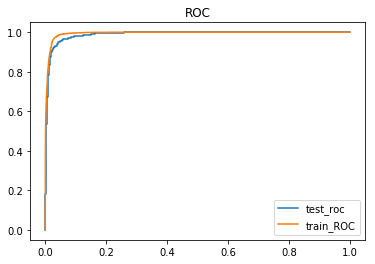

Probability density for train


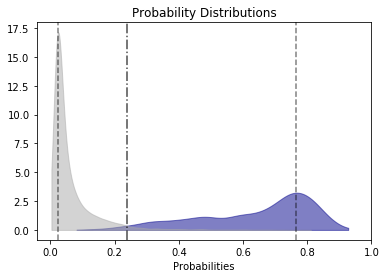

Probability density for test


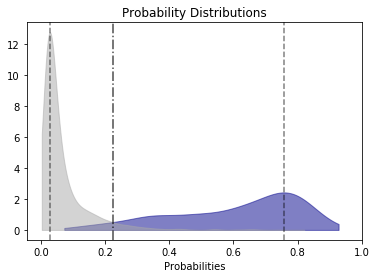


[[2912   22]
 [ 149  358]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          2912   22  2934
1           149  358   507
All        3061  380  3441


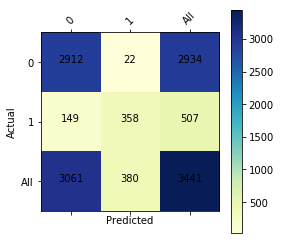

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2934
          1       0.94      0.71      0.81       507

avg / total       0.95      0.95      0.95      3441

ACCURACY 0.9503051438535309
-----------------

AUC_TRAIN =  0.9942977066123458

AUC =  0.9857458370087064


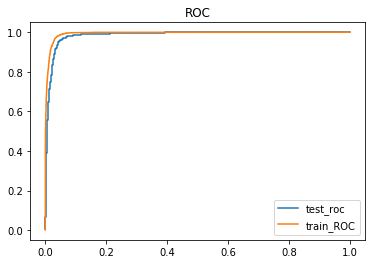

Probability density for train


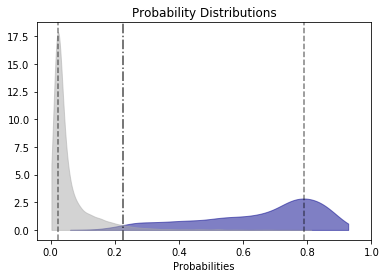

Probability density for test


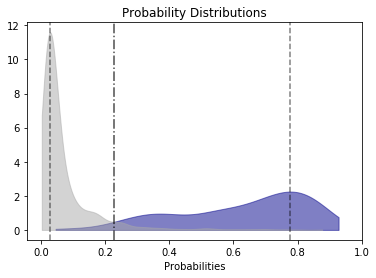


[[2886   49]
 [ 131  375]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          2886   49  2935
1           131  375   506
All        3017  424  3441


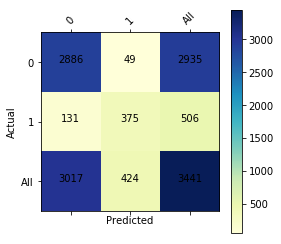

REPORT
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      2935
          1       0.88      0.74      0.81       506

avg / total       0.95      0.95      0.95      3441

ACCURACY 0.9476896251089799
-----------------


In [18]:
# 10 фолдов

groups = np.array(triplexes.pdb_chain.values)
group_kfold = GroupKFold(n_splits=10)
#group_kfold.get_n_splits(X, y, groups)

for train_index, test_index in group_kfold.split(triplexes_data, triplexes_target, groups):
    print("")
    X_train, X_test = triplexes_data.loc[list(train_index)], triplexes_data.loc[test_index]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]
    rf_classifier_cv.fit(X_train, y_train)
    prediction_result = rf_classifier_cv.predict(X_test)
    prediction_prob = rf_classifier_cv.predict_proba(X_test)
    
    #TRY TO PREDICT TRAIN
    prediction_train = rf_classifier_cv.predict(X_train)
    prediction_prob_train = rf_classifier_cv.predict_proba(X_train)
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train,  prediction_prob_train[:, 1])
    auc_train = metrics.roc_auc_score(y_train, prediction_prob_train[:, 1])
    print("AUC_TRAIN = ", auc_train)
    
    #---------------------------------
    print("")
    fpr, tpr, _ = metrics.roc_curve(y_test,  prediction_prob[:, 1])
    auc = metrics.roc_auc_score(y_test, prediction_prob[:, 1])
    print("AUC = ", auc)
    line_test, = plt.plot(fpr, tpr, label='test_roc')
    line_train, = plt.plot(fpr_train, tpr_train, label='train_roc')
    plt.legend( [line_test, line_train], ['test_roc', 'train_ROC'], loc = 4)
    plt.title("ROC")
    plt.show()
    
    print("Probability density for train")
    probability_density(prediction_prob_train[:, 1], y_train)
    print("Probability density for test")
    probability_density(prediction_prob[:, 1], y_test)
    
    print("")
    print(confusion_matrix(y_test, prediction_result))
    plot_confusion_matrix(pd.crosstab(y_test, prediction_result, rownames=['Actual'], colnames=['Predicted'], margins=True))
    
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY", accuracy_score(y_test, prediction_result))
    print("-----------------")



AUC_TRAIN =  0.9945277432451014

AUC =  0.982774936061381


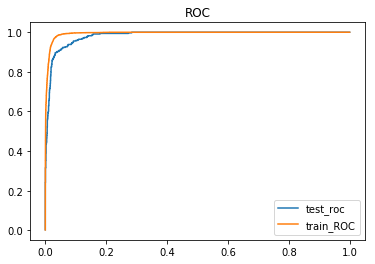

Probability density for train


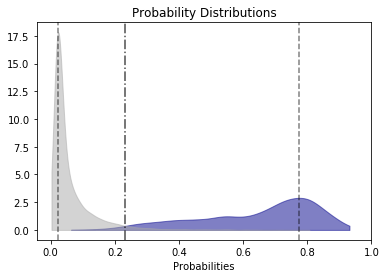

Probability density for test


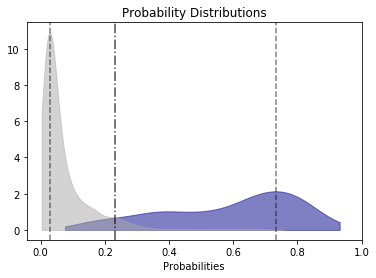


[[1929   26]
 [ 112  228]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1929   26  1955
1           112  228   340
All        2041  254  2295


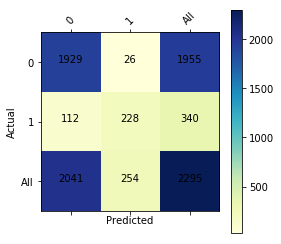

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1955
          1       0.90      0.67      0.77       340

avg / total       0.94      0.94      0.94      2295

ACCURACY 0.9398692810457516
-----------------

AUC_TRAIN =  0.9943137391084679

AUC =  0.9875395167963434


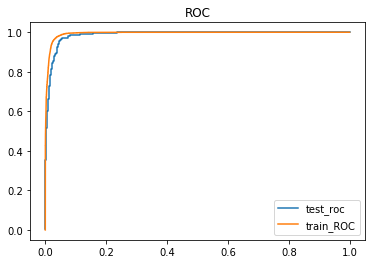

Probability density for train


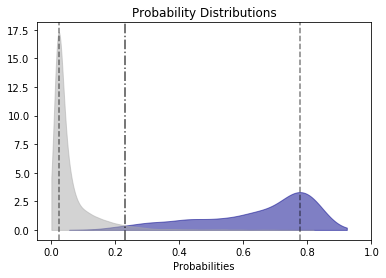

Probability density for test


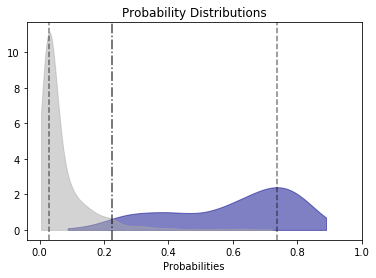


[[1935   23]
 [ 100  237]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1935   23  1958
1           100  237   337
All        2035  260  2295


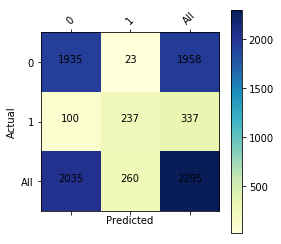

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1958
          1       0.91      0.70      0.79       337

avg / total       0.95      0.95      0.94      2295

ACCURACY 0.9464052287581699
-----------------

AUC_TRAIN =  0.9944043946317705

AUC =  0.9848028843815361


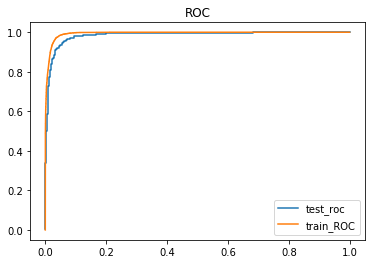

Probability density for train


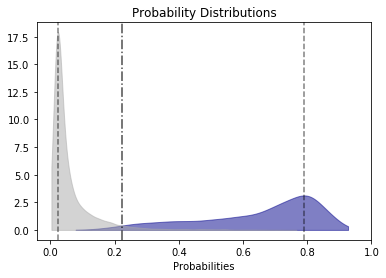

Probability density for test


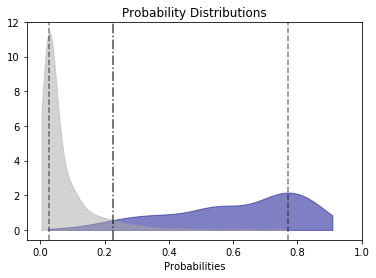


[[1938   20]
 [  96  240]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1938   20  1958
1            96  240   336
All        2034  260  2294


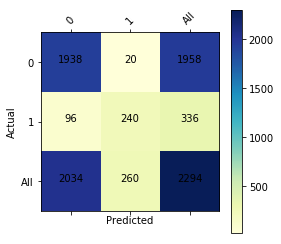

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1958
          1       0.92      0.71      0.81       336

avg / total       0.95      0.95      0.95      2294

ACCURACY 0.949433304272014
-----------------

AUC_TRAIN =  0.9945242805502142

AUC =  0.9836958380737799


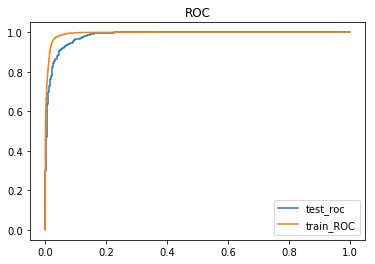

Probability density for train


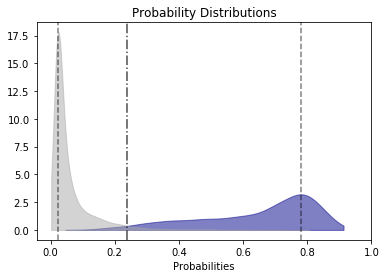

Probability density for test


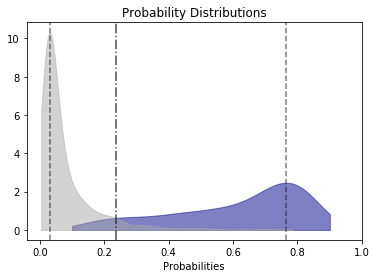


[[1925   24]
 [  95  250]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1925   24  1949
1            95  250   345
All        2020  274  2294


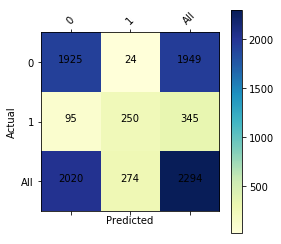

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1949
          1       0.91      0.72      0.81       345

avg / total       0.95      0.95      0.95      2294

ACCURACY 0.9481255448997384
-----------------

AUC_TRAIN =  0.9944594837087057

AUC =  0.9924467680551439


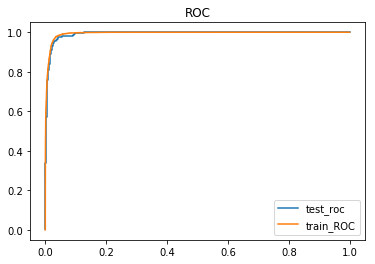

Probability density for train


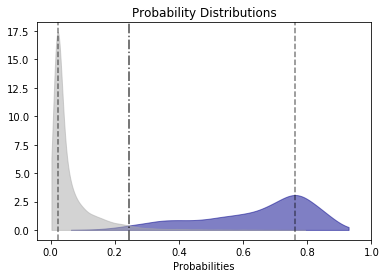

Probability density for test


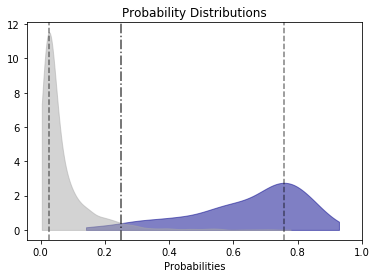


[[1932   21]
 [  65  277]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1932   21  1953
1            65  277   342
All        1997  298  2295


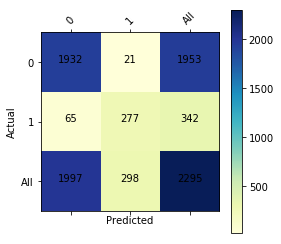

REPORT
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      1953
          1       0.93      0.81      0.87       342

avg / total       0.96      0.96      0.96      2295

ACCURACY 0.9625272331154684
-----------------

AUC_TRAIN =  0.994931240250516

AUC =  0.9917000150443809


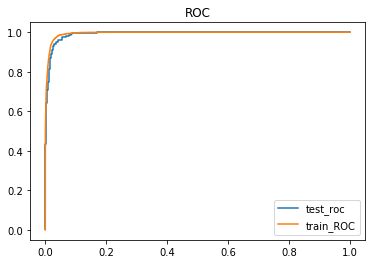

Probability density for train


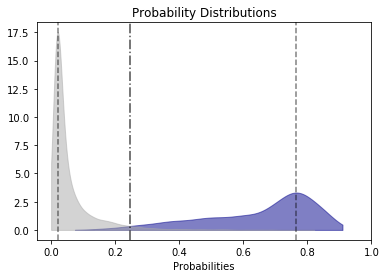

Probability density for test


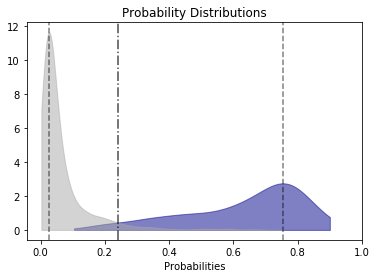


[[1931   24]
 [  82  258]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1931   24  1955
1            82  258   340
All        2013  282  2295


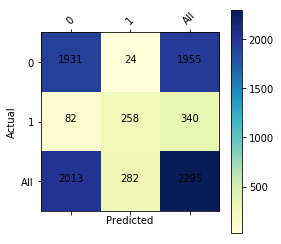

REPORT
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1955
          1       0.91      0.76      0.83       340

avg / total       0.95      0.95      0.95      2295

ACCURACY 0.9538126361655773
-----------------

AUC_TRAIN =  0.9944230396239867

AUC =  0.987489381883016


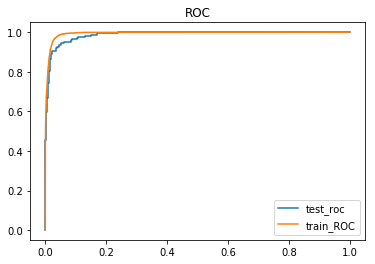

Probability density for train


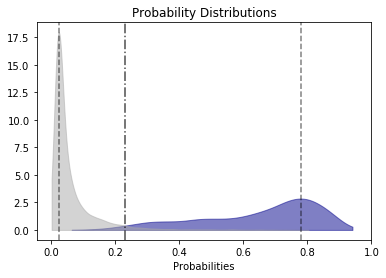

Probability density for test


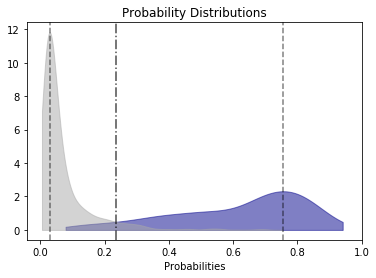


[[1934   20]
 [  93  248]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1934   20  1954
1            93  248   341
All        2027  268  2295


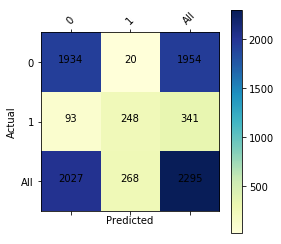

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1954
          1       0.93      0.73      0.81       341

avg / total       0.95      0.95      0.95      2295

ACCURACY 0.9507625272331155
-----------------

AUC_TRAIN =  0.9946767806410101

AUC =  0.9869122991474482


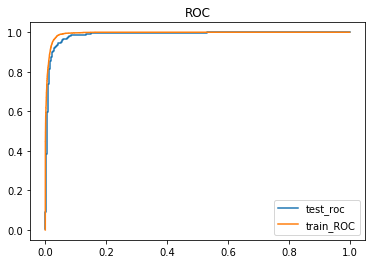

Probability density for train


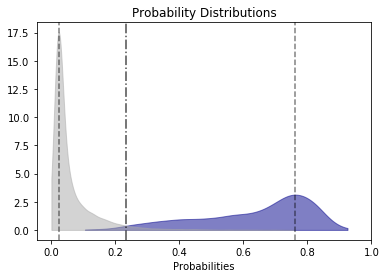

Probability density for test


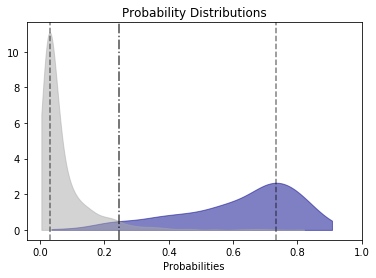


[[1938   21]
 [  84  251]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1938   21  1959
1            84  251   335
All        2022  272  2294


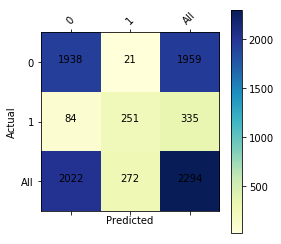

REPORT
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1959
          1       0.92      0.75      0.83       335

avg / total       0.95      0.95      0.95      2294

ACCURACY 0.9542284219703574
-----------------

AUC_TRAIN =  0.9944588032835041

AUC =  0.9879637730493444


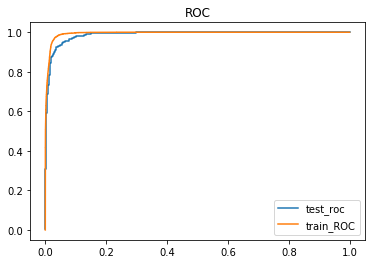

Probability density for train


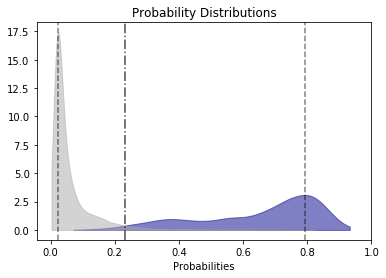

Probability density for test


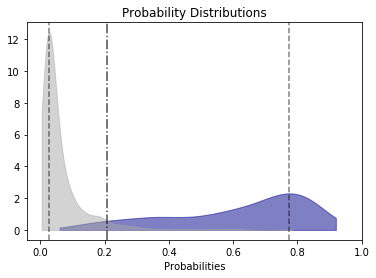


[[1939   18]
 [  94  243]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1939   18  1957
1            94  243   337
All        2033  261  2294


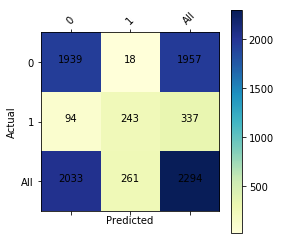

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1957
          1       0.93      0.72      0.81       337

avg / total       0.95      0.95      0.95      2294

ACCURACY 0.951176983435048
-----------------

AUC_TRAIN =  0.9946144719441005

AUC =  0.9882239142798368


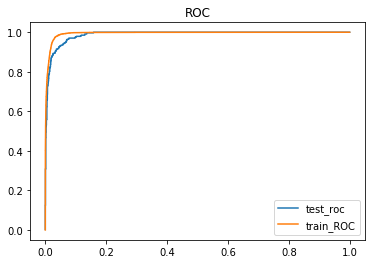

Probability density for train


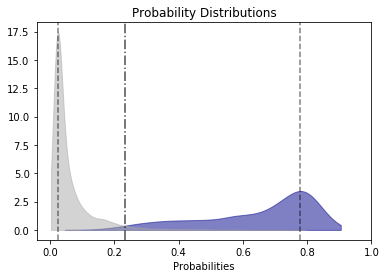

Probability density for test


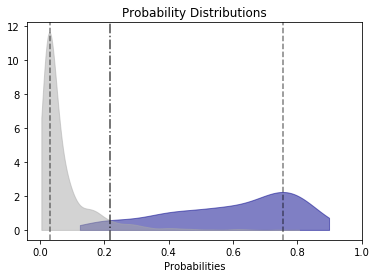


[[1942   14]
 [ 104  234]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1942   14  1956
1           104  234   338
All        2046  248  2294


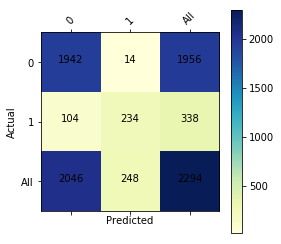

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1956
          1       0.94      0.69      0.80       338

avg / total       0.95      0.95      0.95      2294

ACCURACY 0.948561464690497
-----------------

AUC_TRAIN =  0.994858368966547

AUC =  0.9838098938690926


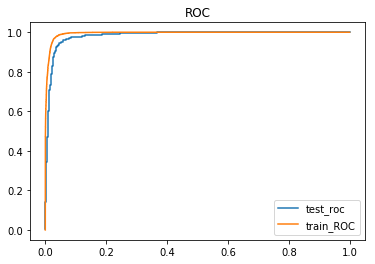

Probability density for train


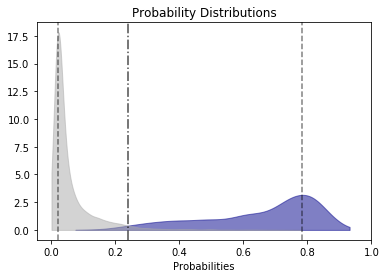

Probability density for test


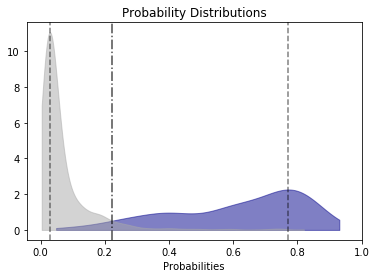


[[1930   29]
 [  96  239]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1930   29  1959
1            96  239   335
All        2026  268  2294


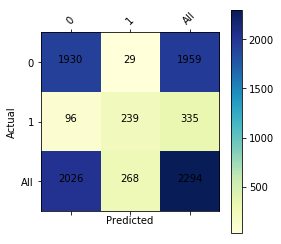

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1959
          1       0.89      0.71      0.79       335

avg / total       0.94      0.95      0.94      2294

ACCURACY 0.9455100261551874
-----------------

AUC_TRAIN =  0.9947487778194797

AUC =  0.9819938956174911


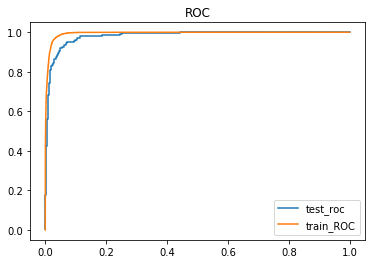

Probability density for train


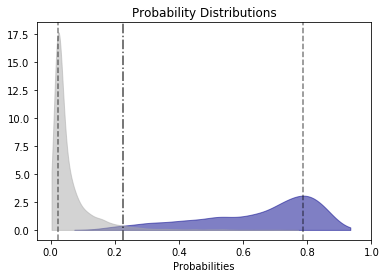

Probability density for test


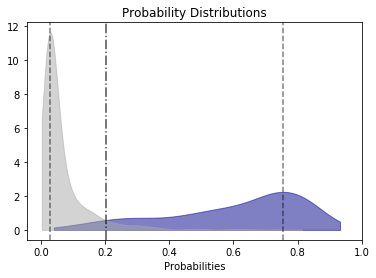


[[1934   24]
 [  95  241]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1934   24  1958
1            95  241   336
All        2029  265  2294


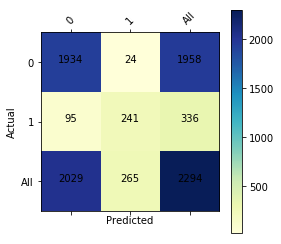

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1958
          1       0.91      0.72      0.80       336

avg / total       0.95      0.95      0.95      2294

ACCURACY 0.9481255448997384
-----------------

AUC_TRAIN =  0.9944248909427434

AUC =  0.9897441700804985


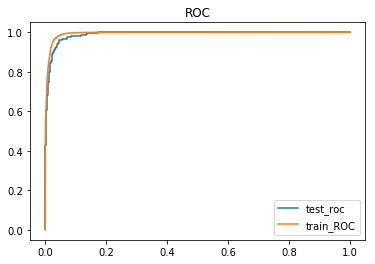

Probability density for train


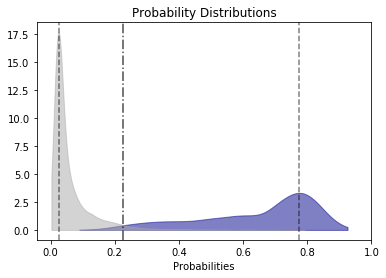

Probability density for test


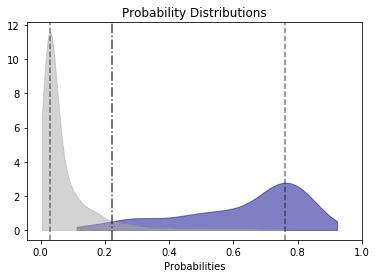


[[1933   22]
 [  82  257]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1933   22  1955
1            82  257   339
All        2015  279  2294


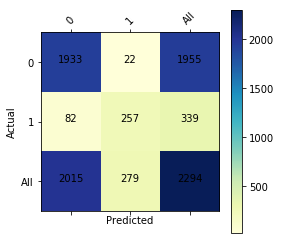

REPORT
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1955
          1       0.92      0.76      0.83       339

avg / total       0.95      0.95      0.95      2294

ACCURACY 0.9546643417611159
-----------------

AUC_TRAIN =  0.9948660964819862

AUC =  0.9828724646140377


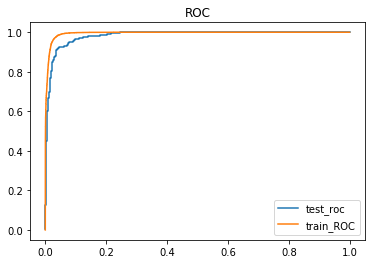

Probability density for train


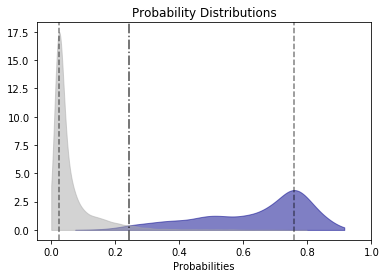

Probability density for test


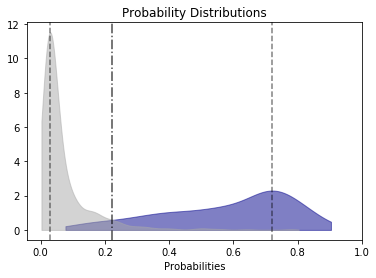


[[1934   24]
 [ 107  229]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1934   24  1958
1           107  229   336
All        2041  253  2294


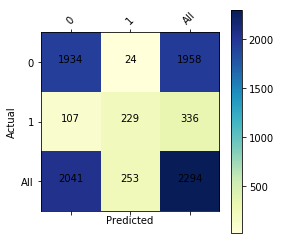

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1958
          1       0.91      0.68      0.78       336

avg / total       0.94      0.94      0.94      2294

ACCURACY 0.9428945074106364
-----------------

AUC_TRAIN =  0.9949722555098133

AUC =  0.9834119018845838


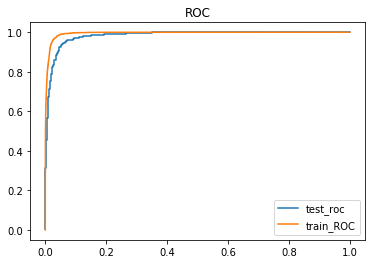

Probability density for train


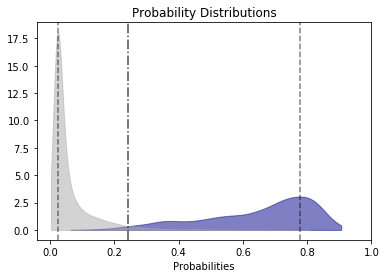

Probability density for test


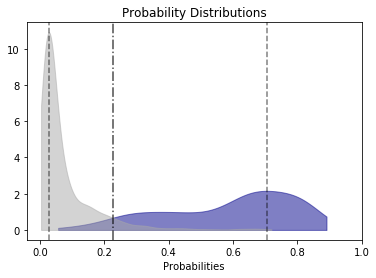


[[1935   22]
 [ 108  229]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1935   22  1957
1           108  229   337
All        2043  251  2294


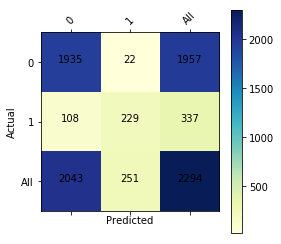

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1957
          1       0.91      0.68      0.78       337

avg / total       0.94      0.94      0.94      2294

ACCURACY 0.9433304272013949
-----------------


In [19]:
# 15 фолдов

groups = np.array(triplexes.pdb_chain.values)
group_kfold = GroupKFold(n_splits=15)

for train_index, test_index in group_kfold.split(triplexes_data, triplexes_target, groups):
    print("")
    X_train, X_test = triplexes_data.loc[list(train_index)], triplexes_data.loc[test_index]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]
    rf_classifier_cv.fit(X_train, y_train)
    prediction_result = rf_classifier_cv.predict(X_test)
    prediction_prob = rf_classifier_cv.predict_proba(X_test)
    
    #TRY TO PREDICT TRAIN
    prediction_train = rf_classifier_cv.predict(X_train)
    prediction_prob_train = rf_classifier_cv.predict_proba(X_train)
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train,  prediction_prob_train[:, 1])
    auc_train = metrics.roc_auc_score(y_train, prediction_prob_train[:, 1])
    print("AUC_TRAIN = ", auc_train)
    
    #---------------------------------
    print("")
    fpr, tpr, _ = metrics.roc_curve(y_test,  prediction_prob[:, 1])
    auc = metrics.roc_auc_score(y_test, prediction_prob[:, 1])
    print("AUC = ", auc)
    line_test, = plt.plot(fpr, tpr, label='test_roc')
    line_train, = plt.plot(fpr_train, tpr_train, label='train_roc')
    plt.legend( [line_test, line_train], ['test_roc', 'train_ROC'], loc = 4)
    plt.title("ROC")
    plt.show()
    
    print("Probability density for train")
    probability_density(prediction_prob_train[:, 1], y_train)
    print("Probability density for test")
    probability_density(prediction_prob[:, 1], y_test)
    
    print("")
    print(confusion_matrix(y_test, prediction_result))
    plot_confusion_matrix(pd.crosstab(y_test, prediction_result, rownames=['Actual'], colnames=['Predicted'], margins=True))
    
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY", accuracy_score(y_test, prediction_result))
    print("-----------------")


# Попробуем изменить порог (threshold) - ЭКСПЕРИМЕНТ

In [27]:
from sklearn.base import BaseEstimator, ClassifierMixin

class CustomThreshold(BaseEstimator, ClassifierMixin):
    """ Custom threshold wrapper for binary classification"""
    def __init__(self, base, threshold=0.5):
        self.base = base
        self.threshold = threshold
    def fit(self, *args, **kwargs):
        self.base.fit(*args, **kwargs)
        return self
    def predict(self, X):
        return (self.base.predict_proba(X)[:, 1] > self.threshold).astype(int)



In [39]:
#ДЛЯ СРАВНЕНИЯ НАПРИМЕР ПОРОГ 75 

rf_classifier_cv = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

groups = np.array(triplexes.pdb_chain.values)
group_kfold = GroupKFold(n_splits=5)

threshold = 0.75

for train_index, test_index in group_kfold.split(triplexes, triplexes_target, groups):
    X_train_middle, X_test_middle = triplexes.loc[list(train_index)], triplexes.loc[test_index]
    X_train = X_train_middle.iloc[:, 5:475]
    X_test = X_test_middle.iloc[:, 5:475]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]

    
    a = Counter(list(triplexes.loc[list(train_index)].pdb_chain.values))
    b = Counter(list(triplexes.loc[list(test_index)].pdb_chain.values))
    
    for key in a:
        if key in b.keys():
            print("FUUUUUUUUU")
    rf_classifier_cv.fit(X_train, y_train)
    
    model_thresholded = CustomThreshold(rf_classifier_cv, threshold)

    prediction_result = model_thresholded.predict(X_test)
    
    print("")
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, prediction_result))
    print("")
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY = ", accuracy_score(y_test, prediction_result))
    print("-----------------")



CONFUSION MATRIX
[[5852   11]
 [ 746  274]]

REPORT
             precision    recall  f1-score   support

          0       0.89      1.00      0.94      5863
          1       0.96      0.27      0.42      1020

avg / total       0.90      0.89      0.86      6883

ACCURACY =  0.8900188871131774
-----------------

CONFUSION MATRIX
[[5860   10]
 [ 737  276]]

REPORT
             precision    recall  f1-score   support

          0       0.89      1.00      0.94      5870
          1       0.97      0.27      0.42      1013

avg / total       0.90      0.89      0.86      6883

ACCURACY =  0.8914717419729768
-----------------

CONFUSION MATRIX
[[5866    2]
 [ 662  353]]

REPORT
             precision    recall  f1-score   support

          0       0.90      1.00      0.95      5868
          1       0.99      0.35      0.52      1015

avg / total       0.91      0.90      0.88      6883

ACCURACY =  0.9035304373093128
-----------------

CONFUSION MATRIX
[[5865    5]
 [ 708  305]]

REP

In [42]:
#ДЛЯ СРАВНЕНИЯ НАПРИМЕР ПОРОГ 24

rf_classifier_cv = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

groups = np.array(triplexes.pdb_chain.values)
group_kfold = GroupKFold(n_splits=5)

threshold = 0.24

for train_index, test_index in group_kfold.split(triplexes, triplexes_target, groups):
    X_train_middle, X_test_middle = triplexes.loc[list(train_index)], triplexes.loc[test_index]
    X_train = X_train_middle.iloc[:, 5:475]
    X_test = X_test_middle.iloc[:, 5:475]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]

    
    a = Counter(list(triplexes.loc[list(train_index)].pdb_chain.values))
    b = Counter(list(triplexes.loc[list(test_index)].pdb_chain.values))
    
    for key in a:
        if key in b.keys():
            print("FUUUUUUUUU")
    rf_classifier_cv.fit(X_train, y_train)
    
    model_thresholded = CustomThreshold(rf_classifier_cv, threshold)

    prediction_result = model_thresholded.predict(X_test)
    
    print("")
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, prediction_result))
    print("")
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY = ", accuracy_score(y_test, prediction_result))
    print("-----------------")



CONFUSION MATRIX
[[5565  298]
 [  91  929]]

REPORT
             precision    recall  f1-score   support

          0       0.98      0.95      0.97      5863
          1       0.76      0.91      0.83      1020

avg / total       0.95      0.94      0.95      6883

ACCURACY =  0.9434839459537993
-----------------

CONFUSION MATRIX
[[5555  315]
 [  71  942]]

REPORT
             precision    recall  f1-score   support

          0       0.99      0.95      0.97      5870
          1       0.75      0.93      0.83      1013

avg / total       0.95      0.94      0.95      6883

ACCURACY =  0.9439198024117391
-----------------

CONFUSION MATRIX
[[5558  310]
 [  44  971]]

REPORT
             precision    recall  f1-score   support

          0       0.99      0.95      0.97      5868
          1       0.76      0.96      0.85      1015

avg / total       0.96      0.95      0.95      6883

ACCURACY =  0.9485689379630975
-----------------

CONFUSION MATRIX
[[5524  346]
 [  44  969]]

REP

In [41]:
#ДЛЯ СРАВНЕНИЯ НАПРИМЕР ПОРОГ 20

rf_classifier_cv = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

groups = np.array(triplexes.pdb_chain.values)
group_kfold = GroupKFold(n_splits=5)

threshold = 0.2

for train_index, test_index in group_kfold.split(triplexes, triplexes_target, groups):
    X_train_middle, X_test_middle = triplexes.loc[list(train_index)], triplexes.loc[test_index]
    X_train = X_train_middle.iloc[:, 5:475]
    X_test = X_test_middle.iloc[:, 5:475]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]

    
    a = Counter(list(triplexes.loc[list(train_index)].pdb_chain.values))
    b = Counter(list(triplexes.loc[list(test_index)].pdb_chain.values))
    
    for key in a:
        if key in b.keys():
            print("FUUUUUUUUU")
    rf_classifier_cv.fit(X_train, y_train)
    
    model_thresholded = CustomThreshold(rf_classifier_cv, threshold)

    prediction_result = model_thresholded.predict(X_test)
    
    print("")
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, prediction_result))
    print("")
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY = ", accuracy_score(y_test, prediction_result))
    print("-----------------")



CONFUSION MATRIX
[[5422  441]
 [  49  971]]

REPORT
             precision    recall  f1-score   support

          0       0.99      0.92      0.96      5863
          1       0.69      0.95      0.80      1020

avg / total       0.95      0.93      0.93      6883

ACCURACY =  0.9288101118698242
-----------------

CONFUSION MATRIX
[[5418  452]
 [  39  974]]

REPORT
             precision    recall  f1-score   support

          0       0.99      0.92      0.96      5870
          1       0.68      0.96      0.80      1013

avg / total       0.95      0.93      0.93      6883

ACCURACY =  0.9286648263838443
-----------------

CONFUSION MATRIX
[[5405  463]
 [  28  987]]

REPORT
             precision    recall  f1-score   support

          0       0.99      0.92      0.96      5868
          1       0.68      0.97      0.80      1015

avg / total       0.95      0.93      0.93      6883

ACCURACY =  0.9286648263838443
-----------------

CONFUSION MATRIX
[[5385  485]
 [  28  985]]

REP

In [43]:
#ДЛЯ СРАВНЕНИЯ НАПРИМЕР ПОРОГ 30

rf_classifier_cv = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

groups = np.array(triplexes.pdb_chain.values)
group_kfold = GroupKFold(n_splits=5)

threshold = 0.3

for train_index, test_index in group_kfold.split(triplexes, triplexes_target, groups):
    X_train_middle, X_test_middle = triplexes.loc[list(train_index)], triplexes.loc[test_index]
    X_train = X_train_middle.iloc[:, 5:475]
    X_test = X_test_middle.iloc[:, 5:475]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]

    
    a = Counter(list(triplexes.loc[list(train_index)].pdb_chain.values))
    b = Counter(list(triplexes.loc[list(test_index)].pdb_chain.values))
    
    for key in a:
        if key in b.keys():
            print("FUUUUUUUUU")
    rf_classifier_cv.fit(X_train, y_train)
    
    model_thresholded = CustomThreshold(rf_classifier_cv, threshold)

    prediction_result = model_thresholded.predict(X_test)
    
    print("")
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, prediction_result))
    print("")
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY = ", accuracy_score(y_test, prediction_result))
    print("-----------------")



CONFUSION MATRIX
[[5700  163]
 [ 140  880]]

REPORT
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      5863
          1       0.84      0.86      0.85      1020

avg / total       0.96      0.96      0.96      6883

ACCURACY =  0.955978497748075
-----------------

CONFUSION MATRIX
[[5688  182]
 [ 122  891]]

REPORT
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      5870
          1       0.83      0.88      0.85      1013

avg / total       0.96      0.96      0.96      6883

ACCURACY =  0.955833212262095
-----------------

CONFUSION MATRIX
[[5658  210]
 [  91  924]]

REPORT
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      5868
          1       0.81      0.91      0.86      1015

avg / total       0.96      0.96      0.96      6883

ACCURACY =  0.9562690687200349
-----------------

CONFUSION MATRIX
[[5675  195]
 [  99  914]]

REPOR

In [44]:
#ДЛЯ СРАВНЕНИЯ НАПРИМЕР ПОРОГ 40

rf_classifier_cv = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

groups = np.array(triplexes.pdb_chain.values)
group_kfold = GroupKFold(n_splits=5)

threshold = 0.4

for train_index, test_index in group_kfold.split(triplexes, triplexes_target, groups):
    X_train_middle, X_test_middle = triplexes.loc[list(train_index)], triplexes.loc[test_index]
    X_train = X_train_middle.iloc[:, 5:475]
    X_test = X_test_middle.iloc[:, 5:475]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]

    
    a = Counter(list(triplexes.loc[list(train_index)].pdb_chain.values))
    b = Counter(list(triplexes.loc[list(test_index)].pdb_chain.values))
    
    for key in a:
        if key in b.keys():
            print("FUUUUUUUUU")
    rf_classifier_cv.fit(X_train, y_train)
    
    model_thresholded = CustomThreshold(rf_classifier_cv, threshold)

    prediction_result = model_thresholded.predict(X_test)
    
    print("")
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, prediction_result))
    print("")
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY = ", accuracy_score(y_test, prediction_result))
    print("-----------------")



CONFUSION MATRIX
[[5755  108]
 [ 245  775]]

REPORT
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      5863
          1       0.88      0.76      0.81      1020

avg / total       0.95      0.95      0.95      6883

ACCURACY =  0.9487142234490774
-----------------

CONFUSION MATRIX
[[5776   94]
 [ 222  791]]

REPORT
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      5870
          1       0.89      0.78      0.83      1013

avg / total       0.95      0.95      0.95      6883

ACCURACY =  0.9540897864303356
-----------------

CONFUSION MATRIX
[[5744  124]
 [ 181  834]]

REPORT
             precision    recall  f1-score   support

          0       0.97      0.98      0.97      5868
          1       0.87      0.82      0.85      1015

avg / total       0.95      0.96      0.96      6883

ACCURACY =  0.955687926776115
-----------------

CONFUSION MATRIX
[[5755  115]
 [ 187  826]]

REPO